
 # **"Predicting the retail customer retention potential**

# "Predicting the   retail customer retention potential level as high/medium/low
# AND
# Customer Segmentation & Pattern Extraction"

# ->>>   Problem Statement








# "Predicting the   retail customer retention potential level as high/medium/low &  Customer Segmentation & Pattern extraction

It is important for any retail company to focus on customer though continuous engagement which translates to increased sales and resultant profitability measured over a period. The customer churn results in not just loss of potential revenue and future profits together with sunk acquisition costs but also negative publicity and incurrence of additional cost of new acquisitions.


On the other hand, Customer focus leads to retention which in turn leads to generation of value, not just volumes. Thus, understanding of customer churn and the underlying factors is central to customer relationship management.


Retailers develop metric to capture customer response towards the product, service, price and competition so that they offer better products and service delivery to customers in comparison with competition. In retail business, a customer is treated as churned once his/her transactions/interactions/visits outdate a particular amount of time. It happens when the product/service is no more used or he uses a product/service of competitor. It is useful to understand defected customer in terms of interests and preferences  to win them back.


It is possible to understand the customer based on historical data of customers containing the characteristics of customers, their transactions, the interactions with them  etc. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement. To ensure that such marketing spend is appropriately directed to the customers likely to be retained and/or with high probability of retention, you are required to classify the retention potential of customer as High/Medium/Low.



You are expected to classify each customer  as high/medium/low under the target attribute “RententionPotential”. Here identifying the medium level customers is important as this category  indicates where some intelligent action may lead to high possibility of retaining the customers who are likely to churn.


You are also required to segment the customers from the standpoint of customer retention for strategic purposes and extract the top 5 patterns for each level in target attribute, while answering other questions too cited below.


**Objectives**

In this hackathon, you are expected

1. to do exploratory Data Analysis using visualizations

2. to build the analytical framework to predict the retail customer retention potential level as high/medium/low 

3. to  segment the customers into different  categories from the standpoint of customer retention which will be used for strategic purposes

4. to extract the top 5 patterns for each level in the target attribute"

# **1.) Importing the Libraries**

In [1]:
# Import necessary libraries
import numpy as np           # Library for numerical computing
import pandas as pd          # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting
import seaborn as sns        # Library for statistical data visualization

**Data information**

"
About Data: 

Data consists of  the  transactions made by the customers, emails sent to the customers and customers profile along with their preferences given during registration etc. 
Target attribute : RetentionPotential"

"Details of the datasets:

**Data consists of :**

         a.  the transactions made by the customers, with the details of  Customer ID, date of order, quantity etc. 

         b.  the emails sent to the customers, with the details of Customer ID, email date, time stamp, email type etc  

         c.  Customers profile and preferences data, with the details of Customer ID, City, date of registration etc


**I. Datasets with  customer id & the target attribute(RetentionPotential) :**

      a.     Train.xlsx
    
      b .     Test.xlsx  ( The target attribute RetentionPotential is not available as it has to be predicted)
        Note:  Use Train.xlsx  for doing the cluster analysis and use  Test.xlsx  for assigning the segment to the new  Customer. (Note : Use train dataset for cluster analysis,  removing the target attribute RetentionPotential)


**II. Other datasets:**
        
        a. Train
              i.   transactionsdata_Train.xlsx

              ii.  Emaildata_Train.xlsx
              iii.  Customerdata_Train.xlsx

        b.  Test
              i.   transactionsdata_Test.xlsx
              ii.  Emaildata_Test.xlsx
              iii.  Customerdata_Test.xlsx
III.  Hint: You may explore further to understand the domain and to do the feature engineering to handle the prediction task . Feature Engineering is important to do the tasks efficiently. "

## Reading the Datasets from the given path

In [2]:
# Load data into pandas dataframes
df_email = pd.read_excel("/content/Emaildata_Train.xlsx")  # Load Emaildata_Train.xlsx into df_email
df_trans = pd.read_excel("/content/transactionsdata_Train.xlsx")  # Load transactionsdata_Train.xlsx into df_trans
df_cust = pd.read_excel("/content/Customerdata_Train.xlsx")  # Load Customerdata_Train.xlsx into df_cust
df_train = pd.read_excel("/content/Train.xlsx")  # Load Train.xlsx into df_train

# Print the shape of each dataframe
print(df_email.shape)  # Print the number of rows and columns in df_email
print(df_trans.shape)  # Print the number of rows and columns in df_trans
print(df_cust.shape)  # Print the number of rows and columns in df_cust
print(df_train.shape)  # Print the number of rows and columns in df_train

(517672, 6)
(104755, 4)
(23820, 7)
(23820, 2)


# **2.Data exploration:**

 Get familiar with the data by checking the data types, summary statistics, missing values, and correlations between features. You can use the following Pandas methods for this:

# Missing Values-Imputation

In [3]:
#Checking head of the dataset (Top 5 records)
df_email

CustomerID DateOfemail        EmailType timestamp MailOpened  \
0          C16368  2012-09-28     WelcomeEmail  15:56:50        yes   
1          C20345  2010-12-19     WelcomeEmail  15:10:30        yes   
2          C17683  2010-10-03     WelcomeEmail  17:12:24        yes   
3          C18647  2010-11-27     WelcomeEmail  16:59:02        yes   
4          C36692  2009-12-04     WelcomeEmail  17:27:22        yes   
...           ...         ...              ...       ...        ...   
517667     C36140  2018-01-18  CustomizedEmail  14:04:44        yes   
517668     C36140  2018-01-21  CustomizedEmail  16:17:16         no   
517669     C36140  2018-01-20  CustomizedEmail  12:17:34        yes   
517670     C36140  2018-01-20  CustomizedEmail  16:31:18        yes   
517671     C36140  2018-01-21  CustomizedEmail  14:23:16        yes   

          MailClicked  
0       NotApplicable  
1       NotApplicable  
2       NotApplicable  
3       NotApplicable  
4       NotApplicable  
...               ...  
517667            yes  
517668             no  
517669            yes  
517670             no  
517671            yes  

[517672 rows x 6 columns]

In [4]:
#Checking for null values
df_email.isna().sum() #checking null values in entire dataframe and it is visible that there are no null values now.

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [5]:
df_email.dtypes  #checking the data types

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [6]:
#Converting all object types to Category types to save the memory while processing
df_email['CustomerID'] = df_email['CustomerID'].astype('category')
df_email['MailOpened'] = df_email['MailOpened'].astype('category')
df_email['MailClicked'] = df_email['MailClicked'].astype('category')
df_email['EmailType'] = df_email['EmailType'].astype('category')

In [7]:
# select the timestamp and DateOfemail columns
new_df = df_email[['timestamp', 'DateOfemail']]
print(new_df)

       timestamp DateOfemail
0       15:56:50  2012-09-28
1       15:10:30  2010-12-19
2       17:12:24  2010-10-03
3       16:59:02  2010-11-27
4       17:27:22  2009-12-04
...          ...         ...
517667  14:04:44  2018-01-18
517668  16:17:16  2018-01-21
517669  12:17:34  2018-01-20
517670  16:31:18  2018-01-20
517671  14:23:16  2018-01-21

[517672 rows x 2 columns]


In [8]:
# create new date column
df_email['datetimeemail'] = pd.to_datetime(df_email['DateOfemail'] + ' ' + df_email['timestamp'])

In [9]:
# drop original columns
df_email.drop(['timestamp', 'DateOfemail'], axis=1, inplace=True)


In [10]:
df_email  ## display the email dataset

CustomerID        EmailType MailOpened    MailClicked  \
0          C16368     WelcomeEmail        yes  NotApplicable   
1          C20345     WelcomeEmail        yes  NotApplicable   
2          C17683     WelcomeEmail        yes  NotApplicable   
3          C18647     WelcomeEmail        yes  NotApplicable   
4          C36692     WelcomeEmail        yes  NotApplicable   
...           ...              ...        ...            ...   
517667     C36140  CustomizedEmail        yes            yes   
517668     C36140  CustomizedEmail         no             no   
517669     C36140  CustomizedEmail        yes            yes   
517670     C36140  CustomizedEmail        yes             no   
517671     C36140  CustomizedEmail        yes            yes   

             datetimeemail  
0      2012-09-28 15:56:50  
1      2010-12-19 15:10:30  
2      2010-10-03 17:12:24  
3      2010-11-27 16:59:02  
4      2009-12-04 17:27:22  
...                    ...  
517667 2018-01-18 14:04:44  
517668 2018-01-21 16:17:16  
517669 2018-01-20 12:17:34  
517670 2018-01-20 16:31:18  
517671 2018-01-21 14:23:16  

[517672 rows x 5 columns]

In [11]:
#Checking Tail of the dataset (Bottom 5 records)
df_email.tail()

CustomerID        EmailType MailOpened MailClicked       datetimeemail
517667     C36140  CustomizedEmail        yes         yes 2018-01-18 14:04:44
517668     C36140  CustomizedEmail         no          no 2018-01-21 16:17:16
517669     C36140  CustomizedEmail        yes         yes 2018-01-20 12:17:34
517670     C36140  CustomizedEmail        yes          no 2018-01-20 16:31:18
517671     C36140  CustomizedEmail        yes         yes 2018-01-21 14:23:16

In [12]:
#Checking shape of the dataset (Rows/Records & Columns)
df_email.shape

(517672, 5)

In [13]:
#Checking the unique values in ItemId
df_email['CustomerID'].nunique()

23820

In [14]:
#Checking datatypes of all columns available in df dataframe
df_email.dtypes

CustomerID             category
EmailType              category
MailOpened             category
MailClicked            category
datetimeemail    datetime64[ns]
dtype: object

In [15]:
# Calculate the number of unique values in each column of the df_email dataframe
email_unique_values = df_email.nunique()

# Print the results
print(email_unique_values)

CustomerID        23820
EmailType             2
MailOpened            2
MailClicked           3
datetimeemail    504555
dtype: int64


In [16]:
# Group email data by CustomerID and aggregate columns
df_email_agg = df_email.groupby('CustomerID').agg({
    'EmailType': 'count',          # Count the number of emails sent by each customer
    'datetimeemail' : 'max',       # Get the maximum datetime for each customer
    'MailOpened': lambda x: sum(x == 'yes'),   # Count the number of emails opened by each customer
    'MailClicked': lambda x: sum(x == 'yes')   # Count the number of emails clicked by each customer
}).reset_index()                 # Reset the index of the resulting dataframe

# Rename columns
df_email_agg.columns = ['CustomerID', 'NumEmailsSent', 'dateTimeemail', 'NumEmailsOpened', 'NumEmailsClicked']


In [17]:
df_email_agg  ## display the email new data set

CustomerID  NumEmailsSent       dateTimeemail  NumEmailsOpened  \
0         C12116             32 2013-10-09 11:49:08                5   
1         C12117              1 2013-12-05 15:59:30                1   
2         C12118              1 2013-09-10 14:49:14                1   
3         C12119             42 2013-10-21 10:24:24               14   
4         C12120              1 2014-01-10 11:40:10                1   
...          ...            ...                 ...              ...   
23815     C42185             44 2011-12-30 13:52:52               10   
23816     C42186              1 2013-11-23 17:28:20                1   
23817     C42187              1 2013-09-15 15:15:34                1   
23818     C42188              1 2011-10-04 13:21:28                1   
23819     C42189             51 2013-11-05 16:32:30               19   

       NumEmailsClicked  
0                     2  
1                     0  
2                     0  
3                     4  
4                     0  
...                 ...  
23815                 0  
23816                 0  
23817                 0  
23818                 0  
23819                 0  

[23820 rows x 5 columns]

In [18]:
df_email_agg.dtypes  # Show the data type of each column in the df_email dataframe

CustomerID                category
NumEmailsSent                int64
dateTimeemail       datetime64[ns]
NumEmailsOpened              int64
NumEmailsClicked             int64
dtype: object

In [19]:
df_trans  ## display the transaction dataset

CustomerID DateOfOrder timestamp  OrderQuantity
0          C16368  2013-08-11  15:17:52             15
1          C20345  2011-04-01  19:50:00             92
2          C20345  2012-06-29  15:11:56             95
3          C20345  2012-09-22  20:49:10             74
4          C20345  2011-08-23  11:50:26             81
...           ...         ...       ...            ...
104750     C12197  2018-01-17  14:35:40             56
104751     C40967  2018-01-17  17:15:20             35
104752     C36140  2018-01-17  13:12:54             47
104753     C36140  2018-01-21  21:12:52             53
104754     C42003  2018-01-17  16:34:46             41

[104755 rows x 4 columns]

In [20]:
df_trans.drop_duplicates(inplace=True) # Drop duplicate rows in the df_trans dataframe and update it in-place


In [21]:
# Show the data type of each column in the df_trans dataframe
df_trans.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [22]:
#Converting all object types to Category types to save the memory while processing
df_trans['CustomerID'] = df_trans['CustomerID'].astype('category')

In [23]:
# create new date column
df_trans['datetimeOrder'] = pd.to_datetime(df_trans['DateOfOrder'] + ' ' + df_trans['timestamp'])

In [24]:
# drop original columns
df_trans.drop(['timestamp', 'DateOfOrder'], axis=1, inplace=True)

In [25]:
# Group transaction data by CustomerID and aggregate columns
df_trans_agg = df_trans.groupby('CustomerID').agg({'datetimeOrder': 'max','OrderQuantity': 'sum'}).reset_index()

In [26]:
df_trans_agg

CustomerID       datetimeOrder  OrderQuantity
0         C12116 2013-10-10 19:50:02            115
1         C12117 2013-12-05 18:47:14             41
2         C12118 2013-09-10 10:08:42             41
3         C12119 2013-10-22 20:48:00             52
4         C12120 2014-01-10 13:24:12             31
...          ...                 ...            ...
23815     C42185 2012-01-03 11:36:44           1340
23816     C42186 2013-11-23 15:11:32             46
23817     C42187 2013-09-15 10:17:54             41
23818     C42188 2011-10-04 21:31:24             51
23819     C42189 2013-11-15 14:13:30            180

[23820 rows x 3 columns]

In [27]:
# Filter rows from the df_trans_agg dataframe where the 'OrderQuantity' column is less than zero
df_trans_agg = df_trans_agg[df_trans_agg['OrderQuantity'] >= 0]


In [28]:
df_trans_agg.dtypes

CustomerID             category
datetimeOrder    datetime64[ns]
OrderQuantity             int64
dtype: object

In [29]:
df_cust  ## dispaly the customer dataset

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  
0                    0                 0               Monday  
1                    1                 1               Friday  
2                    0                 0            Wednesday  
3                    0                 0               Monday  
4                    1                 0               Friday  
...                ...               ...                  ...  
23815                1                 0               Friday  
23816                0                 1               Friday  
23817                0                 0             Saturday  
23818                1                 0             Saturday  
23819                0                 0               Friday  

[23820 rows x 7 columns]

In [30]:
df_cust.dtypes  # Show the data type of each column in the df_cust dataframe

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [31]:
#Converting all object types to Category types to save the memory while processing
df_cust['CustomerID'] = df_cust['CustomerID'].astype('category')
df_cust['City'] = df_cust['City'].astype('category')
df_cust['PreferredDeliveryDay'] = df_cust['PreferredDeliveryDay'].astype('category')


In [32]:
df_cust.dtypes

CustomerID                    category
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
dtype: object

In [33]:
df_train  ## Display the Train dataset

CustomerID RetentionPotential
0         C37869                Low
1         C33841                Low
2         C29464                Low
3         C28158                Low
4         C22785               High
...          ...                ...
23815     C14975                Low
23816     C30392                Low
23817     C41735                Low
23818     C26055                Low
23819     C25058               High

[23820 rows x 2 columns]

here Rentential Potential is Target Variable

In [34]:
df_train.dtypes

CustomerID            object
RetentionPotential    object
dtype: object

In [35]:
#Converting all object types to Category types to save the memory while processing
df_train['CustomerID'] = df_train['CustomerID'].astype('category')
df_train['RetentionPotential'] = df_train['RetentionPotential'].astype('category')

# Merging the df_trans and df_email datasets.

In [36]:
# Merging the train data files
merged_data=pd.merge(df_trans_agg,df_email_agg, how='outer',on='CustomerID')
merged_data=pd.merge(merged_data,df_cust,how='outer',on='CustomerID')

# Merging the merged_data and df_train datasets.

In [37]:
df_final = pd.merge(merged_data, df_train, on='CustomerID')

In [38]:
df_final

CustomerID       datetimeOrder  OrderQuantity  NumEmailsSent  \
0         C12116 2013-10-10 19:50:02            115             32   
1         C12117 2013-12-05 18:47:14             41              1   
2         C12118 2013-09-10 10:08:42             41              1   
3         C12119 2013-10-22 20:48:00             52             42   
4         C12120 2014-01-10 13:24:12             31              1   
...          ...                 ...            ...            ...   
23815     C42185 2012-01-03 11:36:44           1340             44   
23816     C42186 2013-11-23 15:11:32             46              1   
23817     C42187 2013-09-15 10:17:54             41              1   
23818     C42188 2011-10-04 21:31:24             51              1   
23819     C42189 2013-11-15 14:13:30            180             51   

            dateTimeemail  NumEmailsOpened  NumEmailsClicked   City  \
0     2013-10-09 11:49:08                5                 2  CITY3   
1     2013-12-05 15:59:30                1                 0  CITY2   
2     2013-09-10 14:49:14                1                 0  CITY4   
3     2013-10-21 10:24:24               14                 4  CITY2   
4     2014-01-10 11:40:10                1                 0  CITY3   
...                   ...              ...               ...    ...   
23815 2011-12-30 13:52:52               10                 0  CITY2   
23816 2013-11-23 17:28:20                1                 0  CITY4   
23817 2013-09-15 15:15:34                1                 0  CITY2   
23818 2011-10-04 13:21:28                1                 0  CITY4   
23819 2013-11-05 16:32:30               19                 0  CITY3   

      DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0             2013-09-23                    0                0   
1             2013-12-05                    1                0   
2             2013-09-10                    1                0   
3             2013-04-13                    0                0   
4             2014-01-10                    1                0   
...                  ...                  ...              ...   
23815         2011-03-03                    0                0   
23816         2013-11-23                    1                0   
23817         2013-09-15                    1                0   
23818         2011-10-04                    0                0   
23819         2013-01-17                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  
0                     0               Friday                Low  
1                     0               Friday                Low  
2                     0            Wednesday               High  
3                     0               Monday                Low  
4                     0              Tuesday                Low  
...                 ...                  ...                ...  
23815                 0              Tuesday                Low  
23816                 0               Friday               High  
23817                 0              Tuesday               High  
23818                 0               Friday                Low  
23819                 0            Wednesday                Low  

[23820 rows x 14 columns]

In [39]:
customer_train_df = df_final[['CustomerID']].copy()


In [40]:
df_final = df_final.drop('CustomerID', axis=1)


In [41]:
df_final.shape # Show the shape of the df_final dataframe

(23820, 13)

In [42]:
df_final.isnull().sum() # Show the number of null values in each column of the df_final dataframe

datetimeOrder           0
OrderQuantity           0
NumEmailsSent           0
dateTimeemail           0
NumEmailsOpened         0
NumEmailsClicked        0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
RetentionPotential      0
dtype: int64

In [43]:
df_final.info() # Show information about the df_final dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetimeOrder         23820 non-null  datetime64[ns]
 1   OrderQuantity         23820 non-null  int64         
 2   NumEmailsSent         23820 non-null  int64         
 3   dateTimeemail         23820 non-null  datetime64[ns]
 4   NumEmailsOpened       23820 non-null  int64         
 5   NumEmailsClicked      23820 non-null  int64         
 6   City                  23820 non-null  category      
 7   DateOfRegistration    23820 non-null  datetime64[ns]
 8   OnlineCommunication   23820 non-null  int64         
 9   AutomaticRefill       23820 non-null  int64         
 10  DoorstepDelivery      23820 non-null  int64         
 11  PreferredDeliveryDay  23820 non-null  category      
 12  RetentionPotential    23820 non-null  category      
dtypes: category(3), 

In [44]:
df_final.dtypes # Show the data type of each column in the df_final dataframe

datetimeOrder           datetime64[ns]
OrderQuantity                    int64
NumEmailsSent                    int64
dateTimeemail           datetime64[ns]
NumEmailsOpened                  int64
NumEmailsClicked                 int64
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
RetentionPotential            category
dtype: object

In [45]:
df_final.describe()  # Show the descriptive statistics of the numerical columns in the df_final dataframe

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
count   23820.000000   23820.000000     23820.000000      23820.000000   
mean      357.622922      21.732662         6.207389          1.168808   
std      1335.649680      20.040546         8.517405          2.376062   
min         0.000000       1.000000         1.000000          0.000000   
25%        41.000000       1.000000         1.000000          0.000000   
50%        65.000000      20.000000         2.000000          0.000000   
75%       169.000000      41.000000         8.000000          1.000000   
max     51429.000000     292.000000       256.000000         42.000000   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  
count         23820.000000     23820.000000      23820.000000  
mean              0.660411         0.094710          0.037615  
std               0.473580         0.292821          0.190268  
min               0.000000         0.000000          0.000000  
25%               0.000000         0.000000          0.000000  
50%               1.000000         0.000000          0.000000  
75%               1.000000         0.000000          0.000000  
max               1.000000         1.000000          1.000000

OrderQuantity: The quantity of products ordered by the customer in each transaction.

NumEmailsSent: The number of emails sent to the customer.

NumEmailsOpened: The number of emails opened by the customer.

NumEmailsClicked: The number of emails clicked by the customer.

OnlineCommunication: A binary variable indicating whether or not the customer has opted for online communication.

AutomaticRefill: A binary variable indicating whether or not the customer has opted for automatic refill of their orders.

DoorstepDelivery: A binary variable indicating whether or not the customer has opted for doorstep delivery.

The summary statistics include the count, mean, standard deviation, minimum value, 25th percentile, 50th percentile (median), 75th percentile, and maximum value for each column.

For example, we can see that the mean number of emails sent to customers is 21.7, with a standard deviation of 20.0. The median quantity of products ordered in each transaction is 65, and the maximum quantity ordered in a single transaction is 51,429.

In [46]:
df_final.duplicated().sum()
df_final.drop_duplicates(inplace=True)

In [47]:
# Count the number of duplicated rows in the df_final dataframe
num_duplicates = df_final.duplicated().sum()

# Remove duplicated rows from the df_final dataframe
df_final.drop_duplicates(inplace=True)

# Print the number of duplicated rows that were removed
print(f"Removed {num_duplicates} duplicated rows")


Removed 0 duplicated rows


# **3. Visualization**

<ipython-input-48-d30c183497dc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


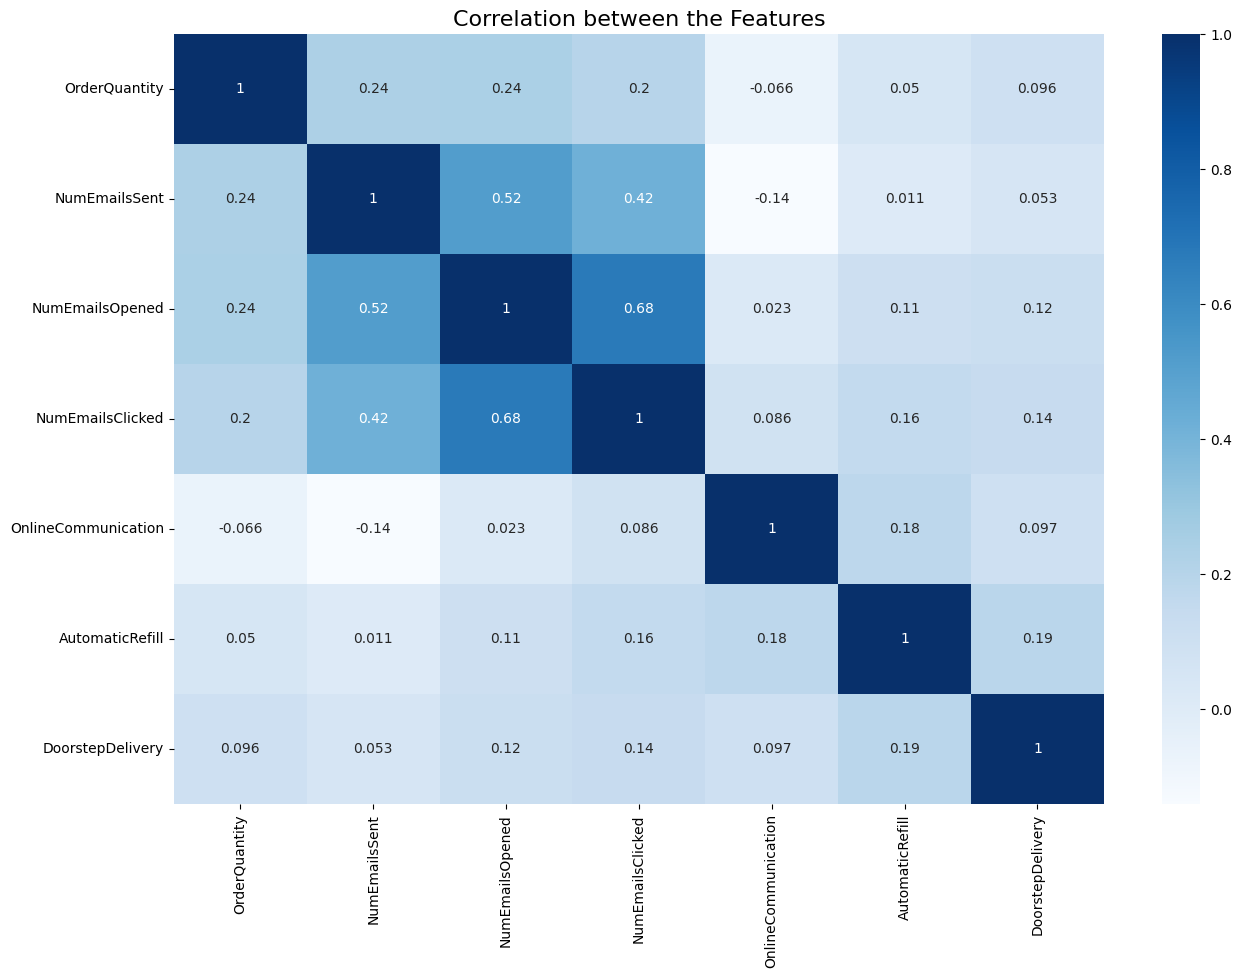

In [48]:
import seaborn as sb
plt.figure(figsize = (15,10))
corr = df_final.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation between the Features', size = 16)
plt.show()

 ## Numerical Plots:

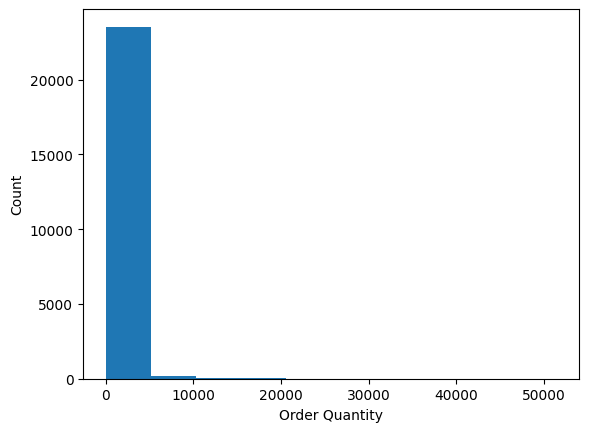

In [49]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Create a histogram of the OrderQuantity column
plt.hist(df_final['OrderQuantity'], bins=10)

# Add labels for the x and y axes
plt.xlabel('Order Quantity')
plt.ylabel('Count')

# Show the plot
plt.show()

# Boxplot:

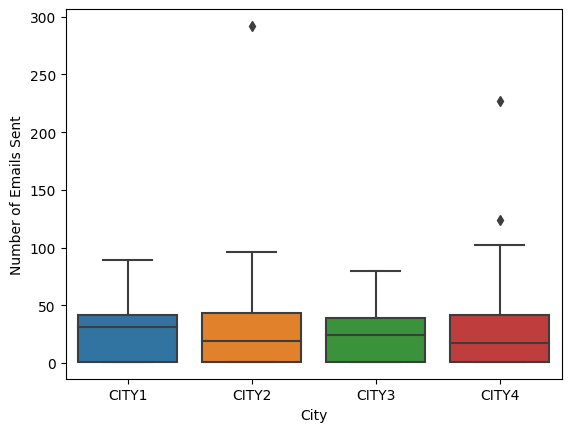

In [50]:
# Create a boxplot of the NumEmailsSent column, grouped by City
sns.boxplot(x='City', y='NumEmailsSent', data=df_final)

# Add labels for the x and y axes
plt.xlabel('City')
plt.ylabel('Number of Emails Sent')

# Show the plot
plt.show()

 # Scatter plot

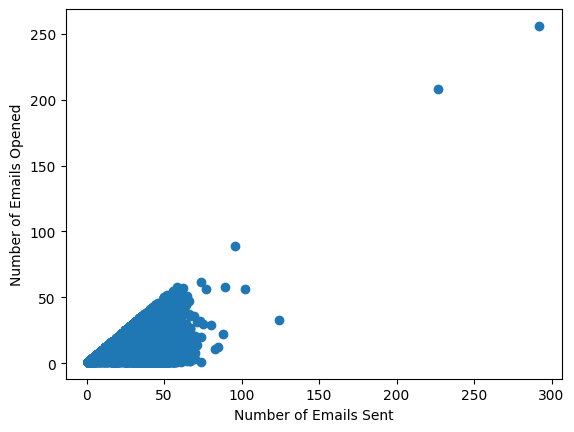

In [51]:
# Create a scatter plot of NumEmailsSent vs NumEmailsOpened
plt.scatter(df_final['NumEmailsSent'], df_final['NumEmailsOpened'])

# Add labels for the x and y axes
plt.xlabel('Number of Emails Sent')
plt.ylabel('Number of Emails Opened')

# Show the plot
plt.show()

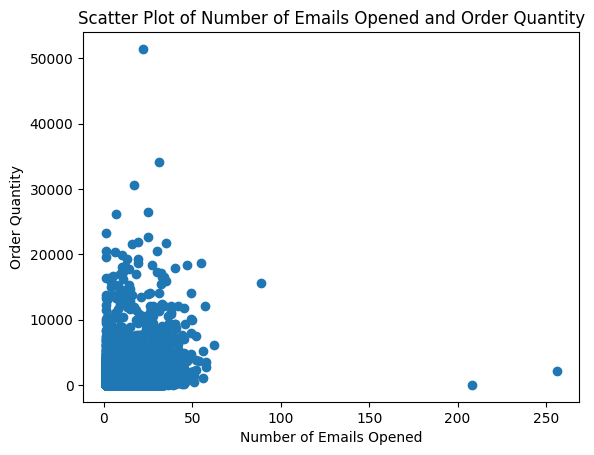

In [52]:
# Create a scatter plot of NumEmailsOpened vs OrderQuantity
plt.scatter(x='NumEmailsOpened', y='OrderQuantity', data=df_final)

# Add labels for the x and y axes
plt.xlabel('Number of Emails Opened')
plt.ylabel('Order Quantity')

# Add a title for the plot
plt.title('Scatter Plot of Number of Emails Opened and Order Quantity')

# Show the plot
plt.show()

# Categorical Plots:

<Axes: xlabel='City', ylabel='count'>

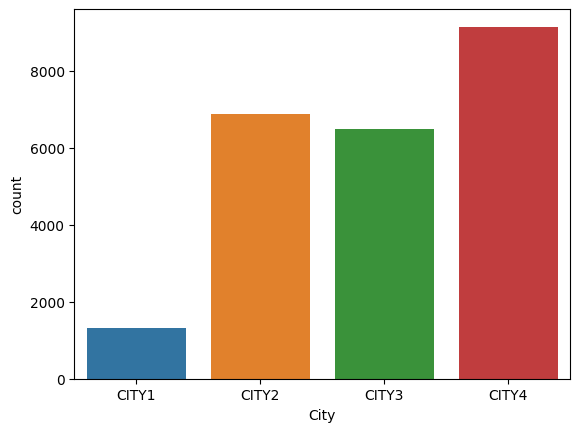

In [53]:
 ##Observing ingredient type variable counts through bargraph
sns.countplot(x='City',data=df_final)

<Axes: xlabel='City'>

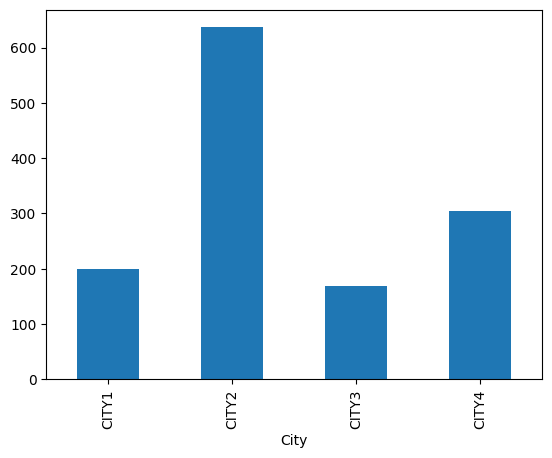

In [54]:
# Explore relationships between variables
df_final.describe()
df_final.groupby('City')['OrderQuantity'].mean().plot(kind='bar')

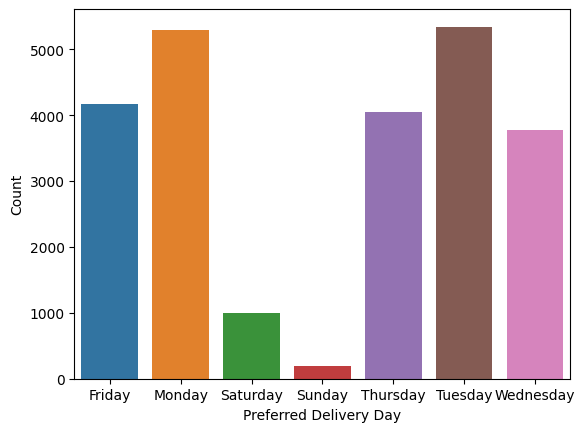

In [55]:
# create a countplot using seaborn
sns.countplot(x='PreferredDeliveryDay', data=df_final)

# add x and y axis labels
plt.xlabel('Preferred Delivery Day')
plt.ylabel('Count')

# display the plot
plt.show()

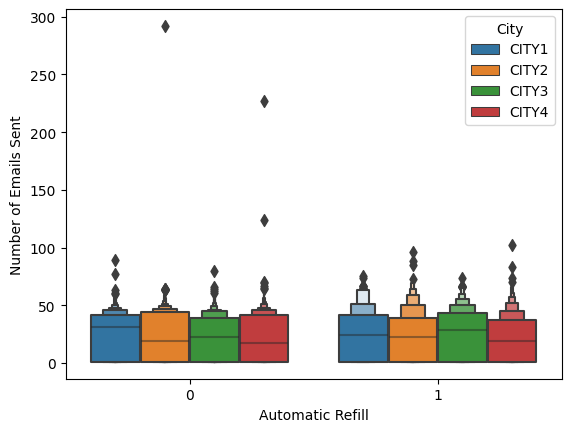

In [56]:
import seaborn as sns

# create a boxenplot using seaborn
sns.boxenplot(x='AutomaticRefill', y='NumEmailsSent', hue='City', data=df_final)

# add x and y axis labels
plt.xlabel('Automatic Refill')
plt.ylabel('Number of Emails Sent')

# display the plot
plt.show()

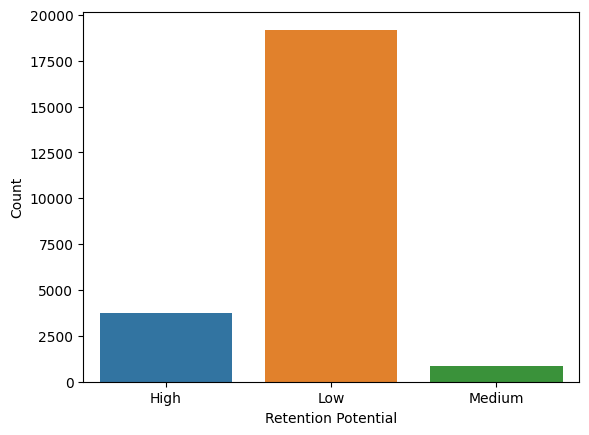

In [57]:
# create a countplot using seaborn
sns.countplot(x='RetentionPotential', data=df_final)

# add x and y axis labels
plt.xlabel('Retention Potential')
plt.ylabel('Count')

# display the plot
plt.show()

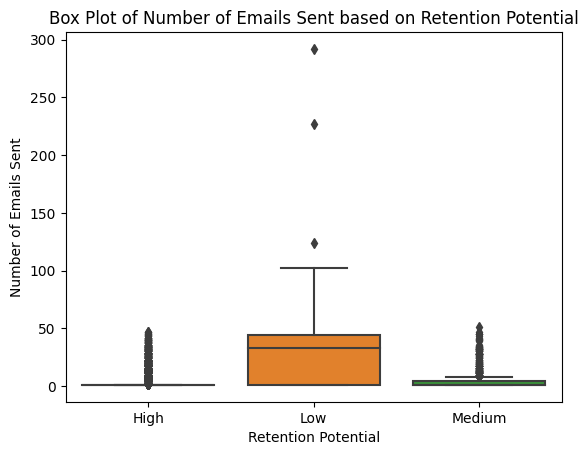

In [58]:
# create a boxplot using seaborn
sns.boxplot(x='RetentionPotential', y='NumEmailsSent', data=df_final)

# add x and y axis labels, and a title
plt.xlabel('Retention Potential')
plt.ylabel('Number of Emails Sent')
plt.title('Box Plot of Number of Emails Sent based on Retention Potential')

# display the plot
plt.show()

In [59]:
df_final['RetentionPotential'].value_counts()  ##display the count of each unique value in the "RetentionPotential" column

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

Counter({'Low': 19185, 'High': 3756, 'Medium': 879})
---INSIGHTS---
Here RetentionPotential of customers are too low in city2,city4,city3


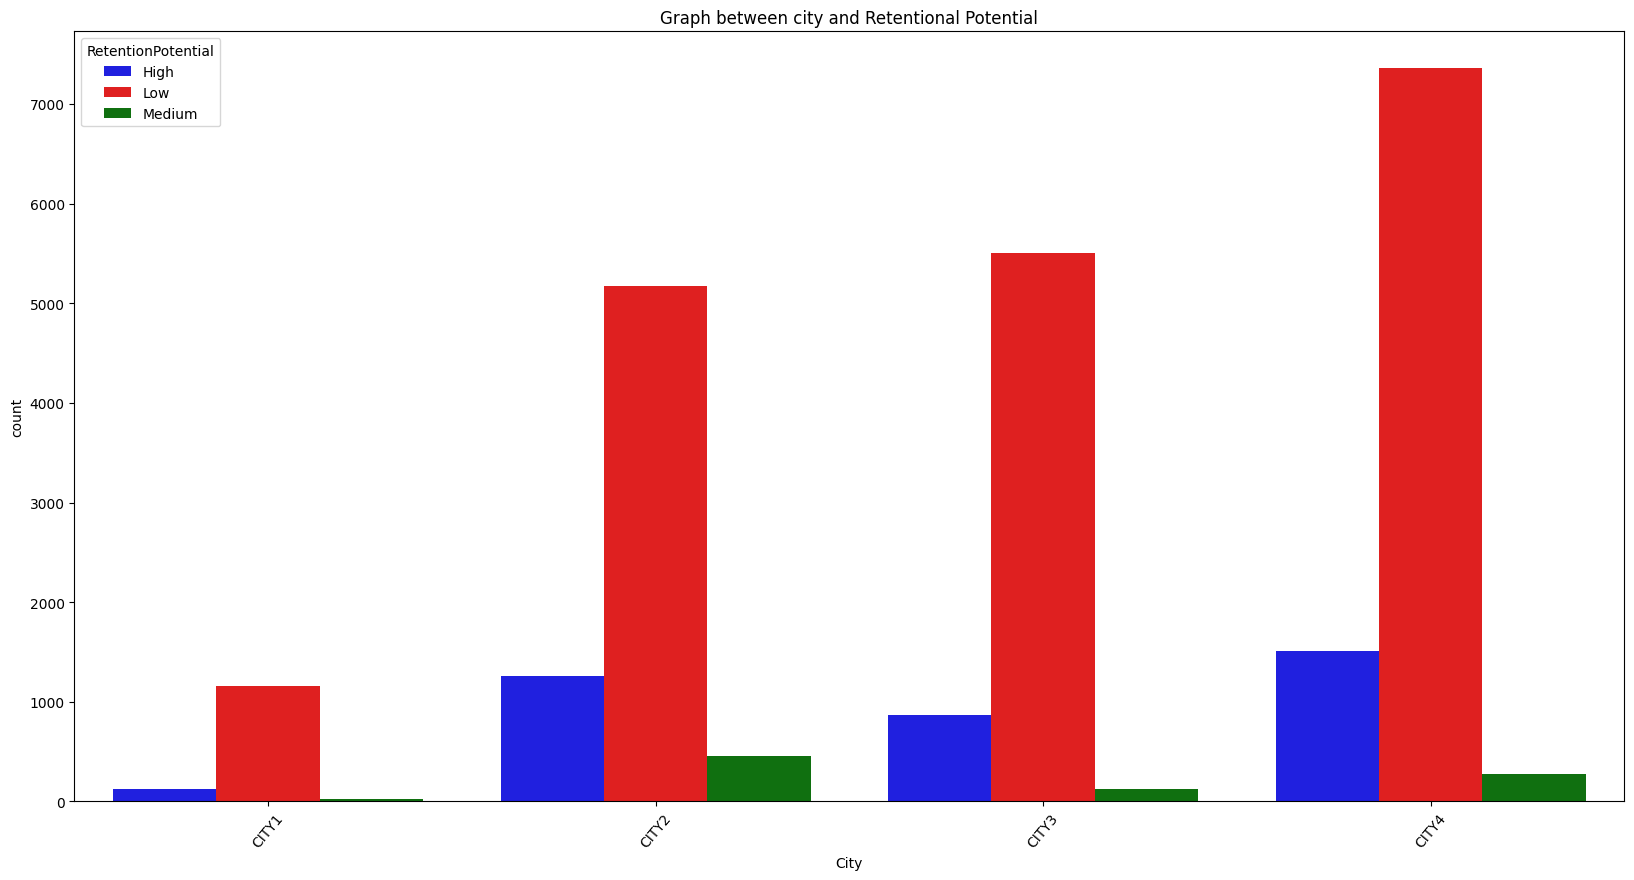

In [60]:
# Import necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of occurrences of each RetentionPotential category
a = Counter(df_final['RetentionPotential'])
print(a)

# Define a function to create barplots
def barplot(column, df):
    bar_plot = sns.countplot(x=column, data=df)

# Loop through the attribute list and create a barplot for each
att = ['City']
for i in att:
    # Set plot size and axis labels
    plt.figure(figsize=(20,10))
    plt.xticks(fontsize=10, rotation=50)
    plt.title('Graph between city and Retentional Potential')
    
    # Create barplot with RetentionPotential as hue
    sns.countplot(x=i, data=df_final, hue='RetentionPotential', palette=['blue', 'red', 'green'])

  
print('---INSIGHTS---')
print('Here RetentionPotential of customers are too low in city2,city4,city3')

Counter({'Tuesday': 5343, 'Monday': 5300, 'Friday': 4167, 'Thursday': 4043, 'Wednesday': 3778, 'Saturday': 1003, 'Sunday': 186})


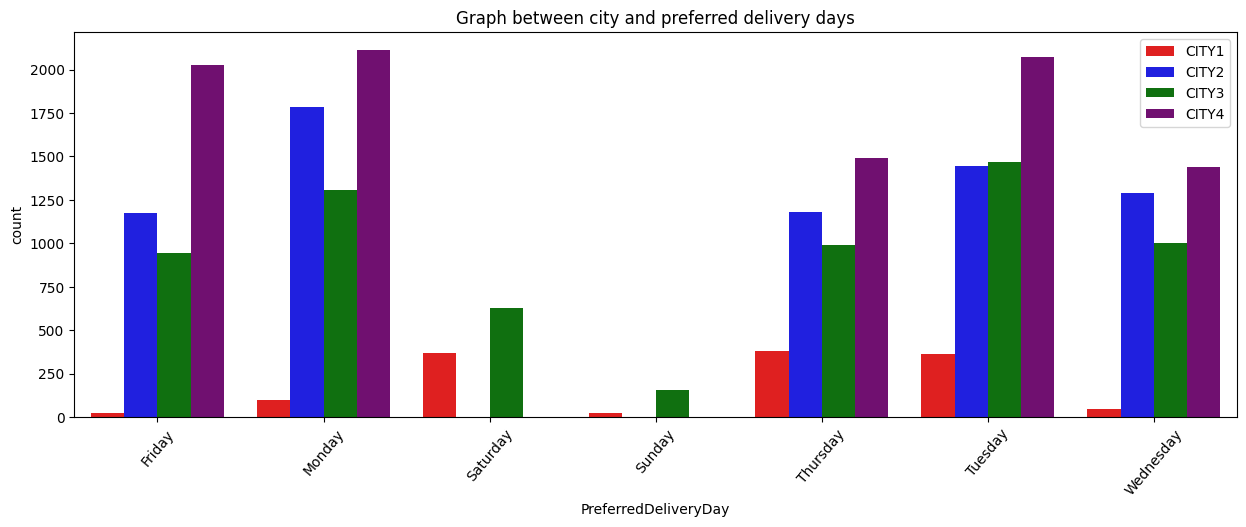

-----INSIGHTS----
Here by observing the preferreddeliverydays,Customers who are buying online are mostly maybe not workingprofessional.Maybe mostly ordereditems are householditems


In [61]:
# Observing the PreferredDeliveryDay
# Count the number of occurrences of each unique value in the column 'PreferredDeliveryDay'
a = Counter(df_final['PreferredDeliveryDay'])
print(a)

# Set the size of the plot and the font size of the x-axis labels
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10, rotation=50)

# Set the title of the plot
plt.title('Graph between city and preferred delivery days')

# Create a countplot of 'PreferredDeliveryDay' with hue as 'City' and set the color palette
sns.countplot(x ='PreferredDeliveryDay', data=df_final, hue='City', palette=['red','blue','green','purple'])

# Place the legend at the upper right corner of the plot
plt.legend(loc='upper right')

# Display the plot
plt.show()


print('-----INSIGHTS----')
print('Here by observing the preferreddeliverydays,Customers who are buying online are mostly maybe not workingprofessional.Maybe mostly ordereditems are householditems')

In [62]:
df_final.shape  ## shape of the final data

(23820, 13)

In [63]:
#Separating numerical and categorical columns
num_cols = df_final.select_dtypes(include=np.number)
cat_cols = df_final.select_dtypes(include='category')

In [64]:
num_cols.columns ## display the numerical column names in final data

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery'],
      dtype='object')

In [65]:
cat_cols.columns ## display the categorical column  names in final data

Index(['City', 'PreferredDeliveryDay', 'RetentionPotential'], dtype='object')

In [66]:
# Get a list of column names for numerical columns
numerical_cols = df_final.select_dtypes(include='number').columns.tolist()

# Print the list of numerical column names
print("Numerical columns:", numerical_cols)

Numerical columns: ['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']


In [67]:
# Selecting the numerical columns
numerical_cols = ['NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked', 'OrderQuantity', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']

# Counting the unique values in each numerical column
unique_counts = df_final[numerical_cols].nunique()
print(unique_counts)

NumEmailsSent            84
NumEmailsOpened          61
NumEmailsClicked         30
OrderQuantity          2206
OnlineCommunication       2
AutomaticRefill           2
DoorstepDelivery          2
dtype: int64


# Create box plots for each numerical column

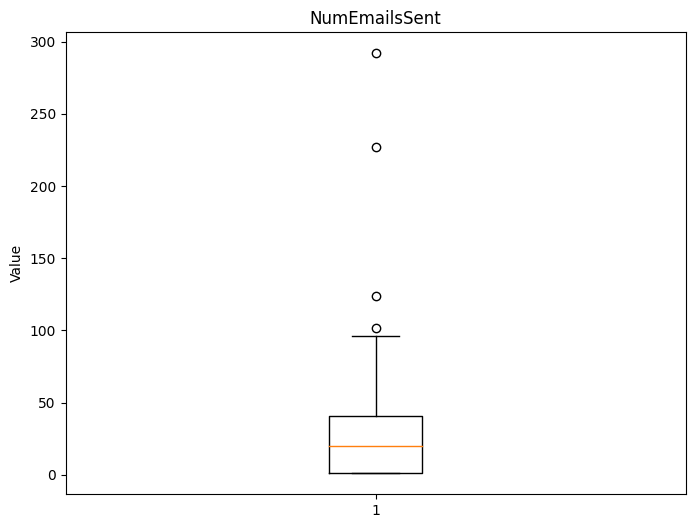

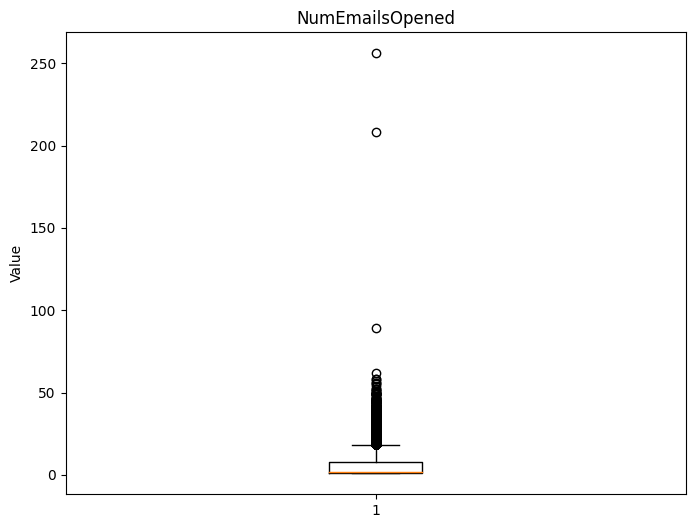

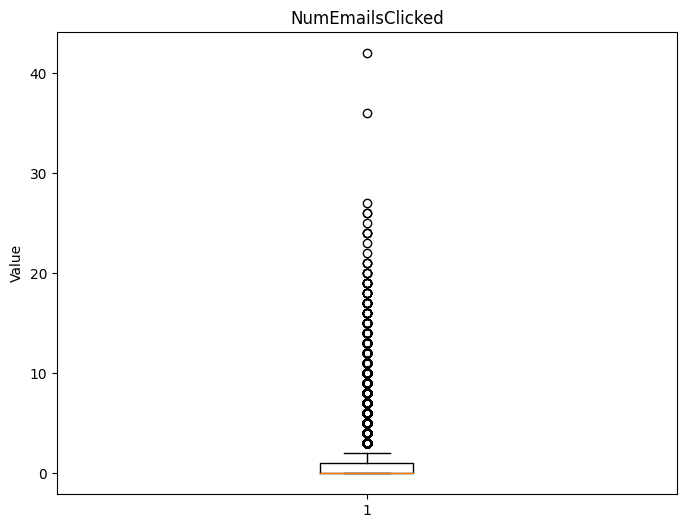

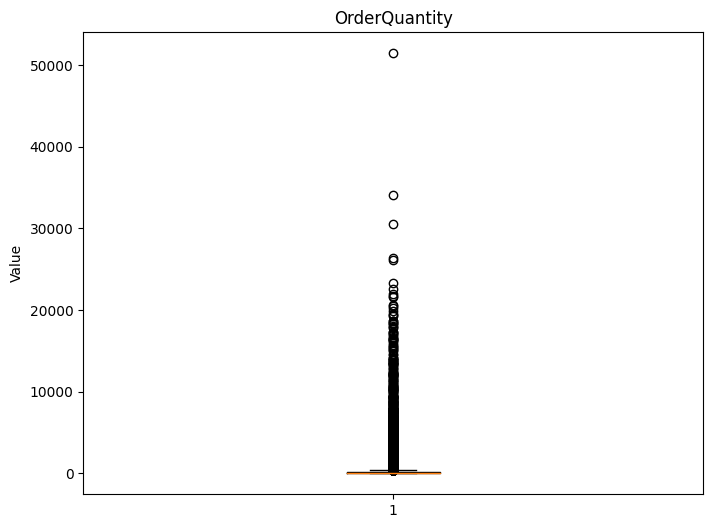

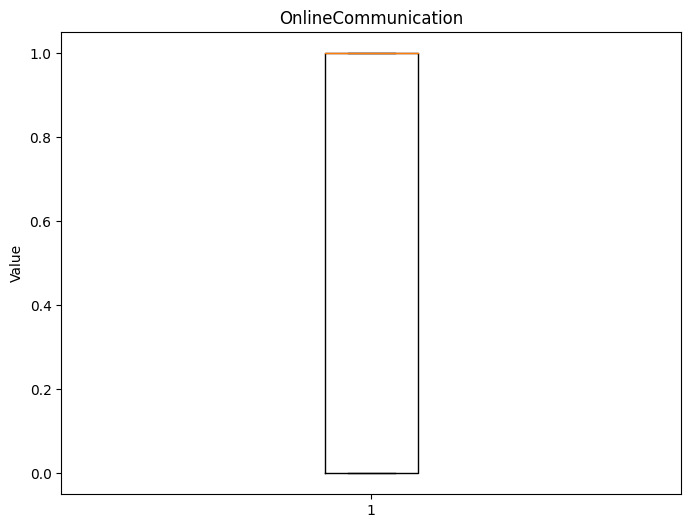

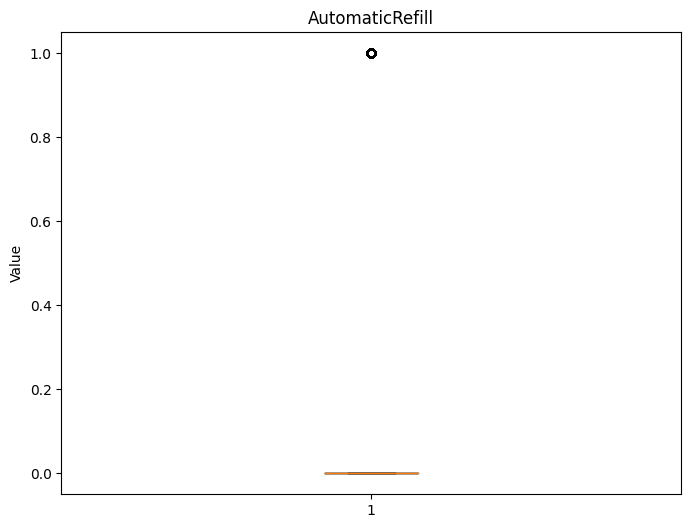

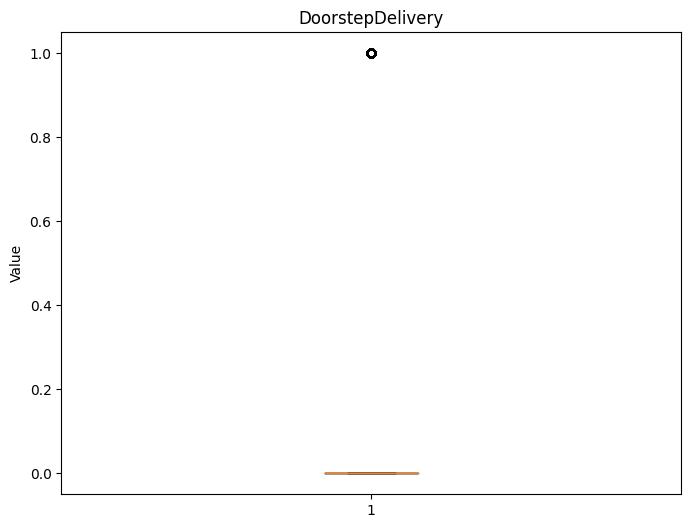

In [68]:
# Create box plots for each numerical column
for col in numerical_cols:  # loop over each numerical column
    plt.figure(figsize=(8, 6))  # create a new figure with a size of 8x6
    plt.boxplot(df_final[col])  # create a boxplot for the column
    plt.title(col)  # add the column name as the title
    plt.ylabel('Value')  # add a label for the y-axis
    plt.show()  # show the plot

# checking the Outlier

OrderQuantity           343
NumEmailsSent             9
NumEmailsOpened         422
NumEmailsClicked        530
OnlineCommunication       0
AutomaticRefill        2256
DoorstepDelivery        896
dtype: int64


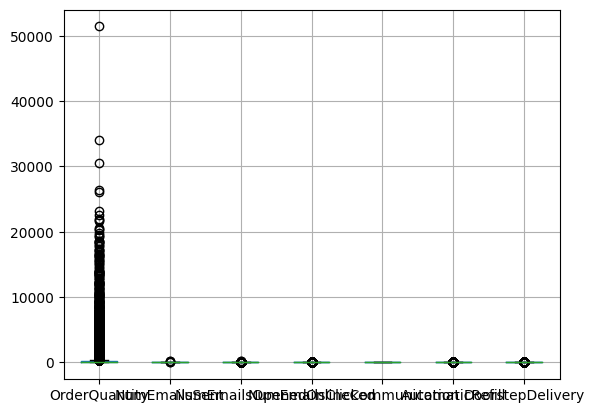

In [69]:
# Create a box plot for each numeric column
df_final.boxplot(column=list(df_final.select_dtypes(include='number').columns))

# Calculate z-scores for all numerical variables
z_scores = df_final.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

# Remove the Outlier

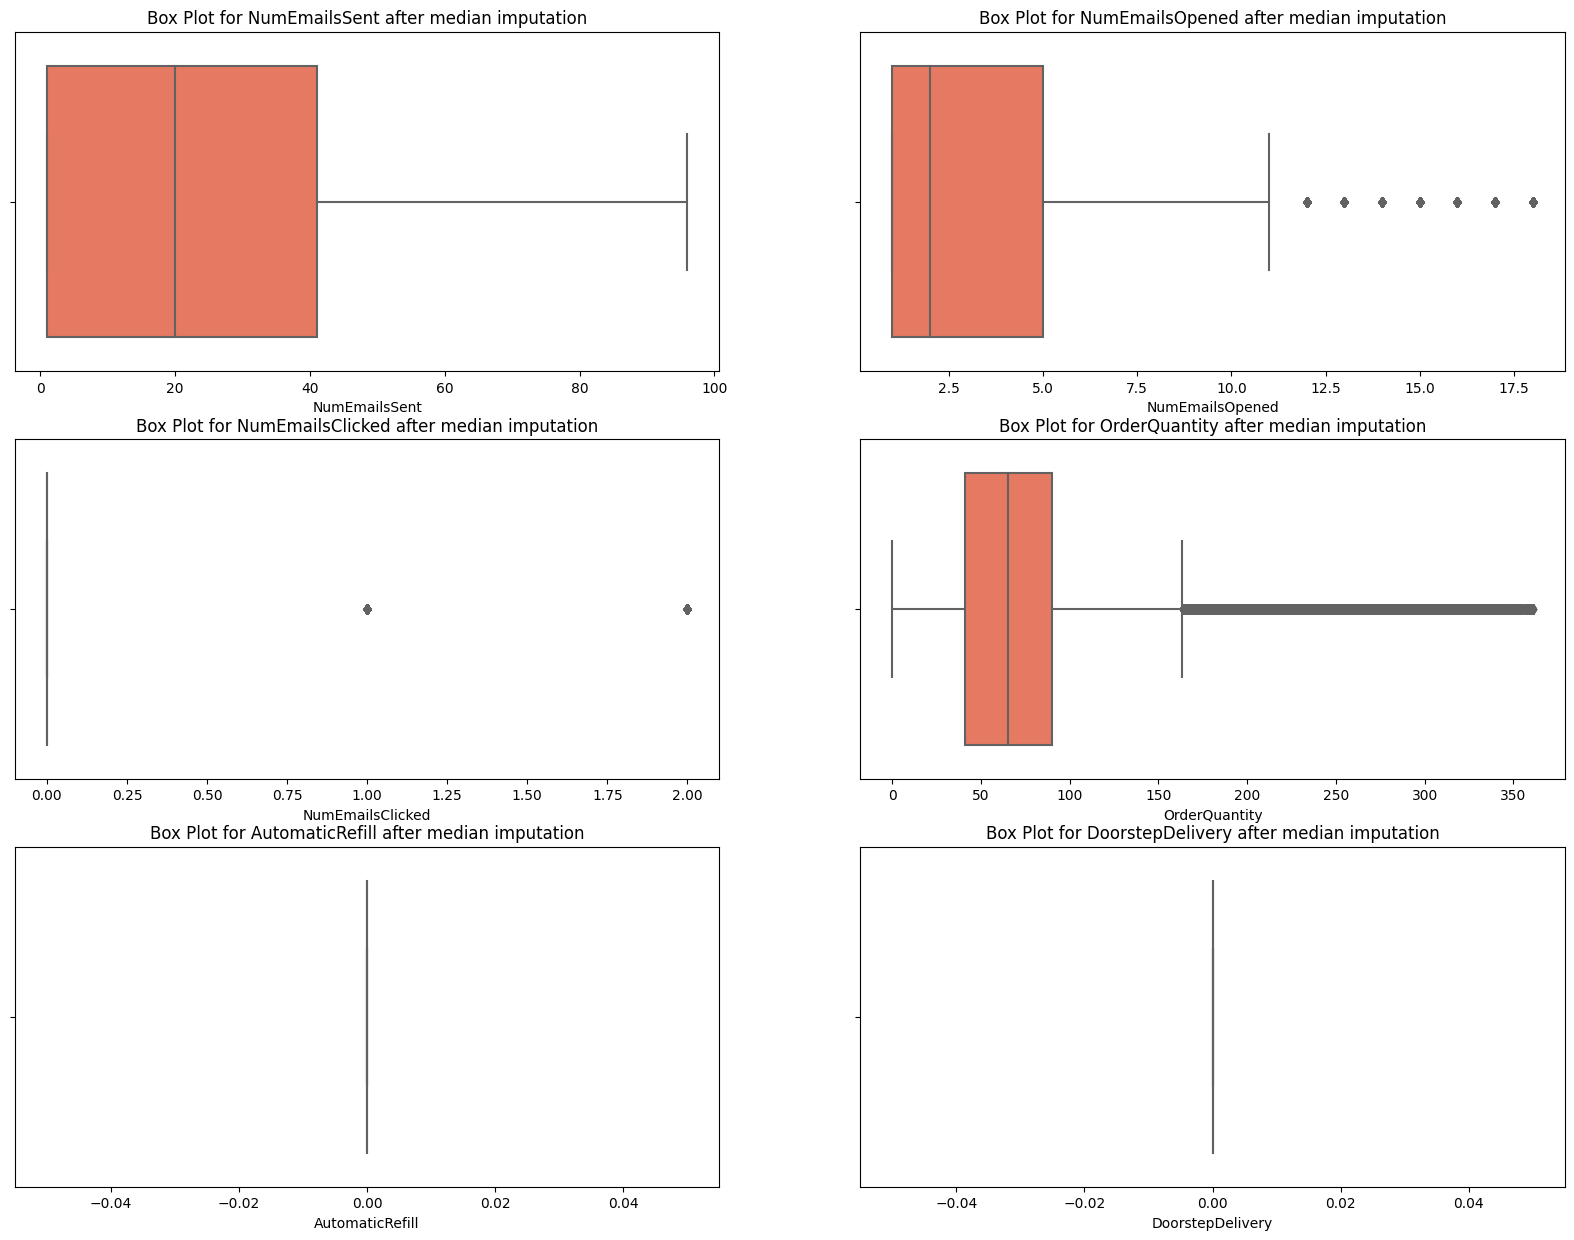

In [70]:
# Define a list of columns to replace outliers
cols_to_replace = ['NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked','OrderQuantity','AutomaticRefill', 'DoorstepDelivery']

# define a function to replace outliers with median value
def replace_outliers(df_final, col):
    # calculate first quartile, third quartile, and interquartile range (IQR)
    q1 = df_final[col].quantile(0.25)
    q3 = df_final[col].quantile(0.75)
    iqr = q3 - q1
    
    # calculate lower and upper tails
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    # calculate median value
    med = np.median(df_final[col])
    
    # replace outliers with median value
    for i in df_final[col]:
        if i > upper_tail or i < lower_tail:
            df_final[col] = df_final[col].replace(i, med)
    
    return df_final

# loop through columns that need outlier replacement
for col in cols_to_replace:
    # call the function to replace outliers with median
    df_final = replace_outliers(df_final, col)

# plot boxplots after median imputation
fig, axs = plt.subplots(3,2, figsize=(20,15))
axs = axs.ravel()
for i, col in enumerate(cols_to_replace):
    sns.boxplot(x=col, data=df_final, palette="Reds_r", ax=axs[i])
    axs[i].set_title("Box Plot for "+col+" after median imputation")
plt.show()



In [71]:
# select the timestamp and DateOfemail columns
new_df = df_final[['datetimeOrder', 'dateTimeemail']]
new_df

datetimeOrder       dateTimeemail
0     2013-10-10 19:50:02 2013-10-09 11:49:08
1     2013-12-05 18:47:14 2013-12-05 15:59:30
2     2013-09-10 10:08:42 2013-09-10 14:49:14
3     2013-10-22 20:48:00 2013-10-21 10:24:24
4     2014-01-10 13:24:12 2014-01-10 11:40:10
...                   ...                 ...
23815 2012-01-03 11:36:44 2011-12-30 13:52:52
23816 2013-11-23 15:11:32 2013-11-23 17:28:20
23817 2013-09-15 10:17:54 2013-09-15 15:15:34
23818 2011-10-04 21:31:24 2011-10-04 13:21:28
23819 2013-11-15 14:13:30 2013-11-05 16:32:30

[23820 rows x 2 columns]

In [72]:
df_final

datetimeOrder  OrderQuantity  NumEmailsSent       dateTimeemail  \
0     2013-10-10 19:50:02            115             32 2013-10-09 11:49:08   
1     2013-12-05 18:47:14             41              1 2013-12-05 15:59:30   
2     2013-09-10 10:08:42             41              1 2013-09-10 14:49:14   
3     2013-10-22 20:48:00             52             42 2013-10-21 10:24:24   
4     2014-01-10 13:24:12             31              1 2014-01-10 11:40:10   
...                   ...            ...            ...                 ...   
23815 2012-01-03 11:36:44             65             44 2011-12-30 13:52:52   
23816 2013-11-23 15:11:32             46              1 2013-11-23 17:28:20   
23817 2013-09-15 10:17:54             41              1 2013-09-15 15:15:34   
23818 2011-10-04 21:31:24             51              1 2011-10-04 13:21:28   
23819 2013-11-15 14:13:30            180             51 2013-11-05 16:32:30   

       NumEmailsOpened  NumEmailsClicked   City DateOfRegistration  \
0                    5                 2  CITY3         2013-09-23   
1                    1                 0  CITY2         2013-12-05   
2                    1                 0  CITY4         2013-09-10   
3                   14                 0  CITY2         2013-04-13   
4                    1                 0  CITY3         2014-01-10   
...                ...               ...    ...                ...   
23815               10                 0  CITY2         2011-03-03   
23816                1                 0  CITY4         2013-11-23   
23817                1                 0  CITY2         2013-09-15   
23818                1                 0  CITY4         2011-10-04   
23819                2                 0  CITY3         2013-01-17   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                        0                0                 0   
1                        1                0                 0   
2                        1                0                 0   
3                        0                0                 0   
4                        1                0                 0   
...                    ...              ...               ...   
23815                    0                0                 0   
23816                    1                0                 0   
23817                    1                0                 0   
23818                    0                0                 0   
23819                    1                0                 0   

      PreferredDeliveryDay RetentionPotential  
0                   Friday                Low  
1                   Friday                Low  
2                Wednesday               High  
3                   Monday                Low  
4                  Tuesday                Low  
...                    ...                ...  
23815              Tuesday                Low  
23816               Friday               High  
23817              Tuesday               High  
23818               Friday                Low  
23819            Wednesday                Low  

[23820 rows x 13 columns]

In [73]:
# Convert the DateOfRegistration column to datetime format
df_final['DateOfRegistration'] = pd.to_datetime(df_final['DateOfRegistration'])

# Extract the month, day, and year as separate columns
df_final['RegistrationMonth'] = df_final['DateOfRegistration'].dt.month
df_final['RegistrationDay'] = df_final['DateOfRegistration'].dt.day
df_final['RegistrationYear'] = df_final['DateOfRegistration'].dt.year


In [74]:
# drop original date columns
df_final.drop(['DateOfRegistration','dateTimeemail', 'datetimeOrder'], axis=1, inplace=True)

In [75]:
df_final

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked   City  \
0                115             32                5                 2  CITY3   
1                 41              1                1                 0  CITY2   
2                 41              1                1                 0  CITY4   
3                 52             42               14                 0  CITY2   
4                 31              1                1                 0  CITY3   
...              ...            ...              ...               ...    ...   
23815             65             44               10                 0  CITY2   
23816             46              1                1                 0  CITY4   
23817             41              1                1                 0  CITY2   
23818             51              1                1                 0  CITY4   
23819            180             51                2                 0  CITY3   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                        0                0                 0   
1                        1                0                 0   
2                        1                0                 0   
3                        0                0                 0   
4                        1                0                 0   
...                    ...              ...               ...   
23815                    0                0                 0   
23816                    1                0                 0   
23817                    1                0                 0   
23818                    0                0                 0   
23819                    1                0                 0   

      PreferredDeliveryDay RetentionPotential  RegistrationMonth  \
0                   Friday                Low                  9   
1                   Friday                Low                 12   
2                Wednesday               High                  9   
3                   Monday                Low                  4   
4                  Tuesday                Low                  1   
...                    ...                ...                ...   
23815              Tuesday                Low                  3   
23816               Friday               High                 11   
23817              Tuesday               High                  9   
23818               Friday                Low                 10   
23819            Wednesday                Low                  1   

       RegistrationDay  RegistrationYear  
0                   23              2013  
1                    5              2013  
2                   10              2013  
3                   13              2013  
4                   10              2014  
...                ...               ...  
23815                3              2011  
23816               23              2013  
23817               15              2013  
23818                4              2011  
23819               17              2013  

[23820 rows x 13 columns]

In [76]:
# Select only the numeric columns from the DataFrame
numeric = df_final._get_numeric_data()

# Print summary information about the numeric DataFrame
print(numeric.info())

# Print the shape of the numeric DataFrame
print(numeric.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   OrderQuantity        23820 non-null  int64
 1   NumEmailsSent        23820 non-null  int64
 2   NumEmailsOpened      23820 non-null  int64
 3   NumEmailsClicked     23820 non-null  int64
 4   OnlineCommunication  23820 non-null  int64
 5   AutomaticRefill      23820 non-null  int64
 6   DoorstepDelivery     23820 non-null  int64
 7   RegistrationMonth    23820 non-null  int64
 8   RegistrationDay      23820 non-null  int64
 9   RegistrationYear     23820 non-null  int64
dtypes: int64(10)
memory usage: 2.0 MB
None
(23820, 10)


In [77]:
# Get non-numeric columns
cat_train = df_final.select_dtypes(include='category')
# Print info of non-numeric columns
cat_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  23820 non-null  category
 1   PreferredDeliveryDay  23820 non-null  category
 2   RetentionPotential    23820 non-null  category
dtypes: category(3)
memory usage: 256.6 KB


In [78]:
numeric.columns  ## To get the columns of the numeric dataframe

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'RegistrationMonth', 'RegistrationDay', 'RegistrationYear'],
      dtype='object')

In [79]:
cat_train.columns  ## To get the columns of the  categoric dataframe

Index(['City', 'PreferredDeliveryDay', 'RetentionPotential'], dtype='object')

In [80]:
# concatenate the categorical and numerical dataframes by joining on columns (axis=1) and retaining only columns present in both (join='inner')
df = pd.concat([cat_train, numeric], join='inner', axis=1)

# print the summary of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  23820 non-null  category
 1   PreferredDeliveryDay  23820 non-null  category
 2   RetentionPotential    23820 non-null  category
 3   OrderQuantity         23820 non-null  int64   
 4   NumEmailsSent         23820 non-null  int64   
 5   NumEmailsOpened       23820 non-null  int64   
 6   NumEmailsClicked      23820 non-null  int64   
 7   OnlineCommunication   23820 non-null  int64   
 8   AutomaticRefill       23820 non-null  int64   
 9   DoorstepDelivery      23820 non-null  int64   
 10  RegistrationMonth     23820 non-null  int64   
 11  RegistrationDay       23820 non-null  int64   
 12  RegistrationYear      23820 non-null  int64   
dtypes: category(3), int64(10)
memory usage: 2.6 MB


In [81]:
df.drop(columns=['City','PreferredDeliveryDay','RetentionPotential'],axis=1,inplace=True) 

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pandas as pd

 # Numerical Columns

In [83]:
# Separate numeric columns
numeric = df.select_dtypes(include='number')

In [84]:
numeric

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0                115             32                5                 2   
1                 41              1                1                 0   
2                 41              1                1                 0   
3                 52             42               14                 0   
4                 31              1                1                 0   
...              ...            ...              ...               ...   
23815             65             44               10                 0   
23816             46              1                1                 0   
23817             41              1                1                 0   
23818             51              1                1                 0   
23819            180             51                2                 0   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                        0                0                 0   
1                        1                0                 0   
2                        1                0                 0   
3                        0                0                 0   
4                        1                0                 0   
...                    ...              ...               ...   
23815                    0                0                 0   
23816                    1                0                 0   
23817                    1                0                 0   
23818                    0                0                 0   
23819                    1                0                 0   

       RegistrationMonth  RegistrationDay  RegistrationYear  
0                      9               23              2013  
1                     12                5              2013  
2                      9               10              2013  
3                      4               13              2013  
4                      1               10              2014  
...                  ...              ...               ...  
23815                  3                3              2011  
23816                 11               23              2013  
23817                  9               15              2013  
23818                 10                4              2011  
23819                  1               17              2013  

[23820 rows x 10 columns]

# Label Encoder  for Retention Potential





In [85]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
label_encoder = LabelEncoder()

# select the columns to be encoded
cols_to_encode = ['RetentionPotential']

# fit and transform the selected columns using label encoding
cat_train[cols_to_encode] = cat_train[cols_to_encode].apply(label_encoder.fit_transform)

# print the encoded DataFrame
cat_train.head()

City PreferredDeliveryDay  RetentionPotential
0  CITY3               Friday                   1
1  CITY2               Friday                   1
2  CITY4            Wednesday                   0
3  CITY2               Monday                   1
4  CITY3              Tuesday                   1

In [86]:
# select the categorical columns
categorical_cols = cat_train.select_dtypes(include=['category']).columns.tolist()

# print the categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['City', 'PreferredDeliveryDay']


# one hot encoder for City and PreferredDeliveryDay

In [87]:
# import the OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# select the categorical columns
categorical_cols = ['City', 'PreferredDeliveryDay']

# create the OneHotEncoder object
ohe = OneHotEncoder(sparse=False, drop='first')

# fit and transform the categorical columns
ohe_cols = ohe.fit_transform(cat_train[categorical_cols])

# create a new dataframe with the one-hot encoded columns
ohe_df = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(categorical_cols))

# concatenate the one-hot encoded dataframe with the original dataframe
cat_train = pd.concat([cat_train, ohe_df], axis=1)

# drop the original categorical columns
cat_train = cat_train.drop(categorical_cols, axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
cat_train

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  
0                               0.0                             0.0  
1                               0.0                             0.0  
2                               0.0                             1.0  
3                               0.0                             0.0  
4                               1.0                             0.0  
...                             ...                             ...  
23815                           1.0                             0.0  
23816                           0.0                             0.0  
23817                           1.0                             0.0  
23818                           0.0                             0.0  
23819                           0.0                             1.0  

[23820 rows x 10 columns]

 # Min Max Scalar

In [89]:
df.columns

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'RegistrationMonth', 'RegistrationDay', 'RegistrationYear'],
      dtype='object')

In [90]:
df.shape

(23820, 10)

In [91]:
# Extract the numerical columns from your DataFrame
numeric_cols = ['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked','OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']
numeric = df[numeric_cols]

# Apply MinMax scaling to the numerical columns
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numeric)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numeric_cols)


In [92]:
df[numeric_cols]=numerical_scaled

In [93]:
numerical_scaled

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000000               0.0   
23818       0.141274       0.000000         0.000000               0.0   
23819       0.498615       0.526316         0.058824               0.0   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  
0                      0.0              0.0               0.0  
1                      1.0              0.0               0.0  
2                      1.0              0.0               0.0  
3                      0.0              0.0               0.0  
4                      1.0              0.0               0.0  
...                    ...              ...               ...  
23815                  0.0              0.0               0.0  
23816                  1.0              0.0               0.0  
23817                  1.0              0.0               0.0  
23818                  0.0              0.0               0.0  
23819                  1.0              0.0               0.0  

[23820 rows x 7 columns]

In [94]:
df

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000000               0.0   
23818       0.141274       0.000000         0.000000               0.0   
23819       0.498615       0.526316         0.058824               0.0   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                      0.0              0.0               0.0   
1                      1.0              0.0               0.0   
2                      1.0              0.0               0.0   
3                      0.0              0.0               0.0   
4                      1.0              0.0               0.0   
...                    ...              ...               ...   
23815                  0.0              0.0               0.0   
23816                  1.0              0.0               0.0   
23817                  1.0              0.0               0.0   
23818                  0.0              0.0               0.0   
23819                  1.0              0.0               0.0   

       RegistrationMonth  RegistrationDay  RegistrationYear  
0                      9               23              2013  
1                     12                5              2013  
2                      9               10              2013  
3                      4               13              2013  
4                      1               10              2014  
...                  ...              ...               ...  
23815                  3                3              2011  
23816                 11               23              2013  
23817                  9               15              2013  
23818                 10                4              2011  
23819                  1               17              2013  

[23820 rows x 10 columns]

# finally., merging the category column and numeric column

In [95]:
# Concatenate categorical and numerical dataframes
final_train = pd.concat([cat_train, df], axis=1)

In [96]:
final_train   ## display the final train dataset

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             1.0   
3                               0.0                             0.0   
4                               1.0                             0.0   
...                             ...                             ...   
23815                           1.0                             0.0   
23816                           0.0                             0.0   
23817                           1.0                             0.0   
23818                           0.0                             0.0   
23819                           0.0                             1.0   

       OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000

In [97]:
final_train.shape 

(23820, 20)

In [98]:
final_train['RetentionPotential'].value_counts()  ## count of each unique value in the 'RetentionPotential' column of the final_train DataFrame.

1    19185
0     3756
2      879
Name: RetentionPotential, dtype: int64

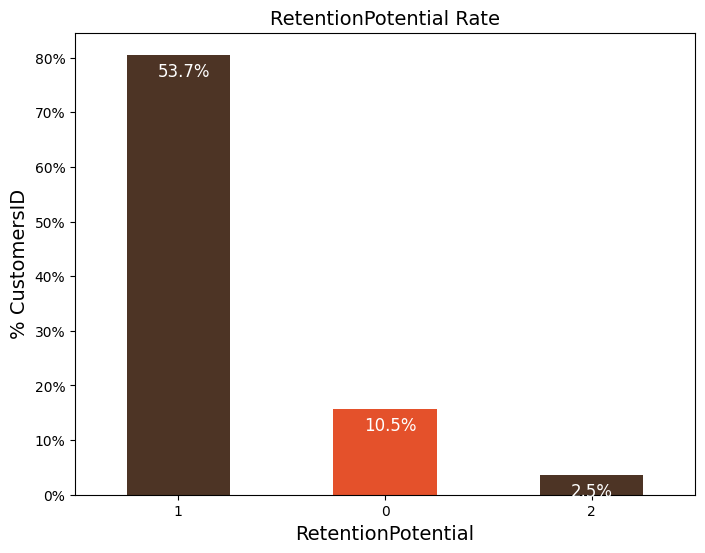

In [99]:
import matplotlib.ticker as mtick

# Define colors for the bar plot
colors = ['#4D3425','#E4512B']

# Calculate percentage of customers in each RetentionPotential category and plot the bar plot
ax = (final_train['RetentionPotential'].value_counts()*100.0 /len(final_train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                       figsize = (8,6))

# Set the y-axis ticks to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Set the x and y labels and title for the plot
ax.set_ylabel('% CustomersID',size = 14)
ax.set_xlabel('RetentionPotential',size = 14)
ax.set_title('RetentionPotential Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12,
            color='white')

In [100]:
final_train.shape

(23820, 20)

In [101]:
final_train.to_csv("model_train_data.csv", index=False)

#  **Test datasets**

## Reading the  test Datasets from the given path


In [102]:
##loading the main Dataset
df_email_test=pd.read_excel("/content/Emaildata_Test.xlsx")
df_trans_test=pd.read_excel("/content/transactionsdata_Test.xlsx")
df_cust_test=pd.read_excel("/content/Customerdata_Test.xlsx")
df_test=pd.read_excel("/content/Test.xlsx")
#Checking the shape of the dataset
print(df_email_test.shape)
print(df_trans_test.shape)
print(df_cust_test.shape)
print(df_test.shape)

(129074, 6)
(26768, 4)
(5955, 7)
(5955, 1)


# **2.Data exploration:**
Get familiar with the data by checking the data types, summary statistics, missing values, and correlations between features. You can use the following Pandas methods for this:

In [103]:
#Checking head of the dataset (Top 5 records)
df_email_test

CustomerID DateOfemail        EmailType timestamp MailOpened  \
0          C17838  2010-10-22     WelcomeEmail  16:59:02        yes   
1          C12403  2008-11-17     WelcomeEmail  12:46:56        yes   
2          C19041  2011-01-24     WelcomeEmail  14:35:22        yes   
3          C24069  2010-09-18     WelcomeEmail  12:25:26        yes   
4          C26718  2010-10-02     WelcomeEmail  11:55:58        yes   
...           ...         ...              ...       ...        ...   
129069     C30169  2018-01-15  CustomizedEmail  13:55:28         no   
129070     C30169  2018-01-15  CustomizedEmail  15:17:34         no   
129071     C30169  2018-01-15  CustomizedEmail  10:24:54        yes   
129072     C30169  2018-01-15  CustomizedEmail  17:15:26        yes   
129073     C30169  2018-01-15  CustomizedEmail  10:10:10        yes   

          MailClicked  
0       NotApplicable  
1       NotApplicable  
2       NotApplicable  
3       NotApplicable  
4       NotApplicable  
...               ...  
129069             no  
129070             no  
129071            yes  
129072             no  
129073             no  

[129074 rows x 6 columns]

In [104]:
#Checking for null values
df_email_test.isna().sum() #checking null values in entire dataframe and it is visible that there are no null values now.

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [105]:
df_email_test.dtypes  #checking the data types

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [106]:
#Converting all object types to Category types to save the memory while processing
df_email_test['CustomerID'] = df_email_test['CustomerID'].astype('category')
df_email_test['MailOpened'] = df_email_test['MailOpened'].astype('category')
df_email_test['MailClicked'] = df_email_test['MailClicked'].astype('category')
df_email_test['EmailType'] = df_email_test['EmailType'].astype('category')

In [107]:
# select the timestamp and DateOfemail columns
new_df_test= df_email_test[['timestamp', 'DateOfemail']]
new_df_test

timestamp DateOfemail
0       16:59:02  2010-10-22
1       12:46:56  2008-11-17
2       14:35:22  2011-01-24
3       12:25:26  2010-09-18
4       11:55:58  2010-10-02
...          ...         ...
129069  13:55:28  2018-01-15
129070  15:17:34  2018-01-15
129071  10:24:54  2018-01-15
129072  17:15:26  2018-01-15
129073  10:10:10  2018-01-15

[129074 rows x 2 columns]

In [108]:
# create new date column
df_email_test['datetimeemail'] = pd.to_datetime(df_email_test['DateOfemail'] + ' ' + df_email_test['timestamp'])

In [109]:
# drop original columns
df_email_test.drop(['timestamp', 'DateOfemail'], axis=1, inplace=True)


In [110]:
df_email_test

CustomerID        EmailType MailOpened    MailClicked  \
0          C17838     WelcomeEmail        yes  NotApplicable   
1          C12403     WelcomeEmail        yes  NotApplicable   
2          C19041     WelcomeEmail        yes  NotApplicable   
3          C24069     WelcomeEmail        yes  NotApplicable   
4          C26718     WelcomeEmail        yes  NotApplicable   
...           ...              ...        ...            ...   
129069     C30169  CustomizedEmail         no             no   
129070     C30169  CustomizedEmail         no             no   
129071     C30169  CustomizedEmail        yes            yes   
129072     C30169  CustomizedEmail        yes             no   
129073     C30169  CustomizedEmail        yes             no   

             datetimeemail  
0      2010-10-22 16:59:02  
1      2008-11-17 12:46:56  
2      2011-01-24 14:35:22  
3      2010-09-18 12:25:26  
4      2010-10-02 11:55:58  
...                    ...  
129069 2018-01-15 13:55:28  
129070 2018-01-15 15:17:34  
129071 2018-01-15 10:24:54  
129072 2018-01-15 17:15:26  
129073 2018-01-15 10:10:10  

[129074 rows x 5 columns]

In [111]:
#Checking Tail of the dataset (Bottom 5 records)
df_email_test.tail()

CustomerID        EmailType MailOpened MailClicked       datetimeemail
129069     C30169  CustomizedEmail         no          no 2018-01-15 13:55:28
129070     C30169  CustomizedEmail         no          no 2018-01-15 15:17:34
129071     C30169  CustomizedEmail        yes         yes 2018-01-15 10:24:54
129072     C30169  CustomizedEmail        yes          no 2018-01-15 17:15:26
129073     C30169  CustomizedEmail        yes          no 2018-01-15 10:10:10

In [112]:
#Checking shape of the dataset (Rows/Records & Columns)
df_email_test.shape

(129074, 5)

In [113]:
#Checking the unique values in ItemId
df_email_test['CustomerID'].nunique()

5955

In [114]:
#Checking datatypes of all columns available in df dataframe
df_email_test.dtypes

CustomerID             category
EmailType              category
MailOpened             category
MailClicked            category
datetimeemail    datetime64[ns]
dtype: object

In [115]:
df_email_test.nunique()

CustomerID         5955
EmailType             2
MailOpened            2
MailClicked           3
datetimeemail    128159
dtype: int64

In [116]:
# Group the email data by CustomerID and aggregate columns using the agg() function
df_email_test_agg = df_email_test.groupby('CustomerID').agg({
    'EmailType': 'count',             # Count the number of emails sent to each customer
    'datetimeemail' : 'max',          # Find the latest date/time that an email was sent to each customer
    'MailOpened': lambda x: sum(x == 'yes'),  # Count the number of emails opened by each customer
    'MailClicked': lambda x: sum(x == 'yes')  # Count the number of emails clicked by each customer
}).reset_index()   # Reset the index of the resulting DataFrame

# Rename the columns in the resulting DataFrame
df_email_test_agg.columns = ['CustomerID', 'NumEmailsSent', 'dateTimeemail', 'NumEmailsOpened', 'NumEmailsClicked']


In [117]:
df_email_test_agg

CustomerID  NumEmailsSent       dateTimeemail  NumEmailsOpened  \
0        C12121             25 2017-12-13 16:29:20                9   
1        C12132              1 2013-10-20 13:59:08                1   
2        C12134              1 2013-09-18 13:21:28                1   
3        C12135             30 2018-01-10 13:42:12                9   
4        C12136             42 2013-10-19 15:11:16                4   
...         ...            ...                 ...              ...   
5950     C42153             11 2012-11-08 16:11:14                3   
5951     C42155              1 2013-09-14 11:51:38                1   
5952     C42157              1 2013-09-30 17:53:26                1   
5953     C42167             50 2017-11-04 14:34:04                4   
5954     C42190              1 2013-09-06 11:34:38                1   

      NumEmailsClicked  
0                    3  
1                    0  
2                    0  
3                    5  
4                    1  
...                ...  
5950                 1  
5951                 0  
5952                 0  
5953                 1  
5954                 0  

[5955 rows x 5 columns]

In [118]:
df_email_test_agg.dtypes

CustomerID                category
NumEmailsSent                int64
dateTimeemail       datetime64[ns]
NumEmailsOpened              int64
NumEmailsClicked             int64
dtype: object

In [119]:
df_email_test_agg.head()

CustomerID  NumEmailsSent       dateTimeemail  NumEmailsOpened  \
0     C12121             25 2017-12-13 16:29:20                9   
1     C12132              1 2013-10-20 13:59:08                1   
2     C12134              1 2013-09-18 13:21:28                1   
3     C12135             30 2018-01-10 13:42:12                9   
4     C12136             42 2013-10-19 15:11:16                4   

   NumEmailsClicked  
0                 3  
1                 0  
2                 0  
3                 5  
4                 1

In [120]:
df_trans_test

CustomerID DateOfOrder timestamp  OrderQuantity
0         C17838  2011-03-28  17:41:08             55
1         C12403  2010-10-12  15:58:02            174
2         C12403  2010-11-27  20:13:48            171
3         C12403  2011-12-09  14:34:44            166
4         C12403  2011-03-04  18:20:18            179
...          ...         ...       ...            ...
26763     C32947  2018-01-17  21:35:26             41
26764     C28951  2018-01-17  17:05:50             40
26765     C38741  2018-01-17  18:56:16             36
26766     C20407  2018-01-17  10:24:52             75
26767     C27220  2018-01-17  12:04:10             40

[26768 rows x 4 columns]

In [121]:
df_trans_test.drop_duplicates(inplace=True)

In [122]:
df_trans_test.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [123]:
#Converting all object types to Category types to save the memory while processing
df_trans_test['CustomerID'] = df_trans_test['CustomerID'].astype('category')

In [124]:
# create new date column
df_trans_test['datetimeOrder'] = pd.to_datetime(df_trans_test['DateOfOrder'] + ' ' + df_trans_test['timestamp'])

In [125]:
# drop original columns
df_trans_test.drop(['timestamp', 'DateOfOrder'], axis=1, inplace=True)

In [126]:
# Group transaction data by CustomerID and aggregate columns
df_trans_test_agg = df_trans_test.groupby('CustomerID').agg({'datetimeOrder': 'max','OrderQuantity': 'sum'}).reset_index()

In [127]:
df_trans_test_agg

CustomerID       datetimeOrder  OrderQuantity
0        C12121 2017-12-14 11:38:00             52
1        C12132 2013-10-20 17:52:44             40
2        C12134 2013-09-18 10:24:48             40
3        C12135 2018-01-10 19:33:58             41
4        C12136 2013-10-19 20:51:18             79
...         ...                 ...            ...
5950     C42153 2012-11-16 19:36:50            379
5951     C42155 2013-09-14 10:08:02             41
5952     C42157 2013-09-30 21:58:44             41
5953     C42167 2017-11-06 20:13:12            502
5954     C42190 2013-09-06 10:48:18             40

[5955 rows x 3 columns]

In [128]:
df_trans_test.dtypes

CustomerID             category
OrderQuantity             int64
datetimeOrder    datetime64[ns]
dtype: object

In [129]:
df_cust_test

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  
0                   0                 0             Thursday  
1                   1                 0            Wednesday  
2                   1                 0               Friday  
3                   0                 0            Wednesday  
4                   0                 0               Monday  
...               ...               ...                  ...  
5950                0                 0               Friday  
5951                0                 0               Friday  
5952                0                 0               Monday  
5953                0                 0               Friday  
5954                0                 0               Friday  

[5955 rows x 7 columns]

In [130]:
df_cust_test.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [131]:
#Converting all object types to Category types to save the memory while processing
df_cust_test['CustomerID'] = df_cust_test['CustomerID'].astype('category')
df_cust_test['City'] = df_cust_test['City'].astype('category')
df_cust_test['PreferredDeliveryDay'] = df_cust_test['PreferredDeliveryDay'].astype('category')

In [132]:
df_cust_test.dtypes

CustomerID                    category
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
dtype: object

In [133]:
df_test

CustomerID
0        C12121
1        C12132
2        C12134
3        C12135
4        C12136
...         ...
5950     C42153
5951     C42155
5952     C42157
5953     C42167
5954     C42190

[5955 rows x 1 columns]

In [134]:
df_test.dtypes

CustomerID    object
dtype: object

In [135]:
#Converting all object types to Category types to save the memory while processing
df_test['CustomerID'] = df_test['CustomerID'].astype('category')


# Merging the  test Dataset

In [136]:
# Merging the train data files
merged_test_data=pd.merge(df_trans_test_agg,df_email_test_agg, how='outer',on='CustomerID')
merged_test_data=pd.merge(merged_test_data,df_cust_test,how='outer',on='CustomerID')

In [137]:
df_test_final = pd.merge(merged_test_data, df_test, on='CustomerID')

In [138]:
df_test_final

CustomerID       datetimeOrder  OrderQuantity  NumEmailsSent  \
0        C12121 2017-12-14 11:38:00             52             25   
1        C12132 2013-10-20 17:52:44             40              1   
2        C12134 2013-09-18 10:24:48             40              1   
3        C12135 2018-01-10 19:33:58             41             30   
4        C12136 2013-10-19 20:51:18             79             42   
...         ...                 ...            ...            ...   
5950     C42153 2012-11-16 19:36:50            379             11   
5951     C42155 2013-09-14 10:08:02             41              1   
5952     C42157 2013-09-30 21:58:44             41              1   
5953     C42167 2017-11-06 20:13:12            502             50   
5954     C42190 2013-09-06 10:48:18             40              1   

           dateTimeemail  NumEmailsOpened  NumEmailsClicked   City  \
0    2017-12-13 16:29:20                9                 3  CITY1   
1    2013-10-20 13:59:08                1                 0  CITY3   
2    2013-09-18 13:21:28                1                 0  CITY3   
3    2018-01-10 13:42:12                9                 5  CITY3   
4    2013-10-19 15:11:16                4                 1  CITY2   
...                  ...              ...               ...    ...   
5950 2012-11-08 16:11:14                3                 1  CITY1   
5951 2013-09-14 11:51:38                1                 0  CITY4   
5952 2013-09-30 17:53:26                1                 0  CITY4   
5953 2017-11-04 14:34:04                4                 1  CITY2   
5954 2013-09-06 11:34:38                1                 0  CITY3   

     DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0            2017-12-04                    1                0   
1            2013-10-20                    1                0   
2            2013-09-18                    1                0   
3            2017-11-01                    1                0   
4            2013-09-28                    1                0   
...                 ...                  ...              ...   
5950         2012-08-28                    1                0   
5951         2013-09-14                    1                0   
5952         2013-09-30                    1                0   
5953         2016-10-28                    0                0   
5954         2013-09-06                    1                0   

      DoorstepDelivery PreferredDeliveryDay  
0                    0               Friday  
1                    0              Tuesday  
2                    0               Monday  
3                    1            Wednesday  
4                    0             Thursday  
...                ...                  ...  
5950                 0               Sunday  
5951                 0             Thursday  
5952                 0              Tuesday  
5953                 0               Monday  
5954                 0               Monday  

[5955 rows x 13 columns]

In [139]:
# Get the shape (i.e., number of rows and columns) of the df_test_final DataFrame
df_test_final.shape

(5955, 13)

In [140]:
# Check for missing values in the df_test_final DataFrame and sum them up for each column
df_test_final.isnull().sum()

CustomerID              0
datetimeOrder           0
OrderQuantity           0
NumEmailsSent           0
dateTimeemail           0
NumEmailsOpened         0
NumEmailsClicked        0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [141]:
# Get information about the df_test_final DataFrame, such as the column data types and number of non-null values
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   category      
 1   datetimeOrder         5955 non-null   datetime64[ns]
 2   OrderQuantity         5955 non-null   int64         
 3   NumEmailsSent         5955 non-null   int64         
 4   dateTimeemail         5955 non-null   datetime64[ns]
 5   NumEmailsOpened       5955 non-null   int64         
 6   NumEmailsClicked      5955 non-null   int64         
 7   City                  5955 non-null   category      
 8   DateOfRegistration    5955 non-null   datetime64[ns]
 9   OnlineCommunication   5955 non-null   int64         
 10  AutomaticRefill       5955 non-null   int64         
 11  DoorstepDelivery      5955 non-null   int64         
 12  PreferredDeliveryDay  5955 non-null   category      
dtypes: category(3), da

In [142]:
# Get the data types of the columns in the df_test_final DataFrame
df_test_final.dtypes

CustomerID                    category
datetimeOrder           datetime64[ns]
OrderQuantity                    int64
NumEmailsSent                    int64
dateTimeemail           datetime64[ns]
NumEmailsOpened                  int64
NumEmailsClicked                 int64
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
dtype: object

In [143]:
# Compute basic statistics for the columns in the df_test_final DataFrame
df_test_final.describe()

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
count    5955.000000    5955.000000      5955.000000       5955.000000   
mean      379.416793      21.674895         6.175987          1.161713   
std      1665.587177      20.451572         9.315447          2.795014   
min         1.000000       1.000000         1.000000          0.000000   
25%        41.000000       1.000000         1.000000          0.000000   
50%        63.000000      20.000000         2.000000          0.000000   
75%       162.000000      42.000000         8.000000          1.000000   
max     57960.000000     280.000000       272.000000        119.000000   

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  
count          5955.000000      5955.000000       5955.000000  
mean              0.659278         0.095046          0.038959  
std               0.473992         0.293303          0.193513  
min               0.000000         0.000000          0.000000  
25%               0.000000         0.000000          0.000000  
50%               1.000000         0.000000          0.000000  
75%               1.000000         0.000000          0.000000  
max               1.000000         1.000000          1.000000

In [144]:
# Count the number of duplicate rows in the df_test_final DataFrame
df_test_final.duplicated().sum()

# Drop duplicate rows from the df_test_final DataFrame and modify it in place
df_test_final.drop_duplicates(inplace=True)

<Axes: xlabel='City', ylabel='count'>

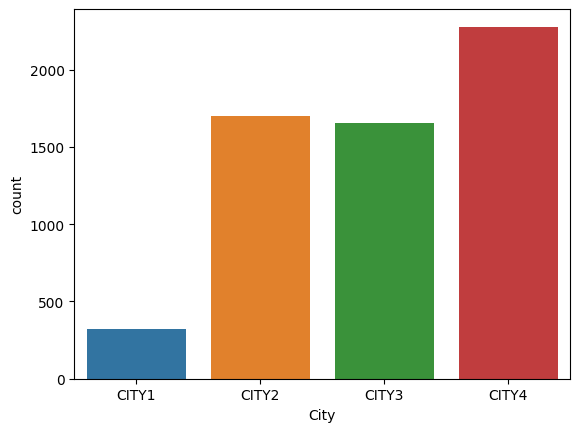

In [145]:
# Plot a count of customers by city using Seaborn's countplot
sns.countplot(x='City', data=df_test_final)

<Axes: xlabel='City'>

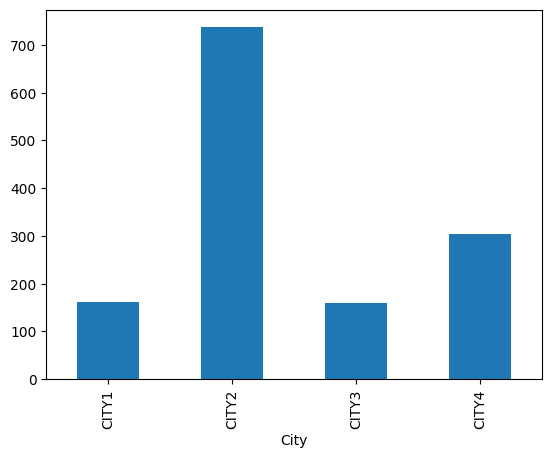

In [146]:
# Generate descriptive statistics for the DataFrame
df_test_final.describe()

# Group the DataFrame by city and calculate the mean of the 'OrderQuantity' column for each group, then plot a bar chart of the results
df_test_final.groupby('City')['OrderQuantity'].mean().plot(kind='bar')


In [147]:
# Create a new DataFrame with only the 'CustomerID' column from df_test_final
customer_df = df_test_final[['CustomerID']].copy()

In [148]:
# Create a new DataFrame with all columns from df_test_final except 'CustomerID'
df_test_final1 = df_test_final.drop('CustomerID', axis=1)

In [149]:
df_test_final1.shape

(5955, 12)

In [150]:
#Separating numerical and categorical columns
num_cols = df_test_final1.select_dtypes(include=np.number)
cat_cols = df_test_final1.select_dtypes(include='category')

In [151]:
num_cols.columns  ##numerical columns

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery'],
      dtype='object')

In [152]:
cat_cols.columns  ##categorical columns

Index(['City', 'PreferredDeliveryDay'], dtype='object')

In [153]:
# Select columns that are of numeric data type
numerical_cols = df_test_final1.select_dtypes(include='number').columns.tolist()

# Print the list of numerical columns
print("Numerical columns:", numerical_cols)

Numerical columns: ['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']


In [154]:
##creates a list of numerical column names.
numerical_cols = ['NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked', 'OrderQuantity', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']

## to calculate the number of unique values for each column in the list of numerical columns.
unique_counts = df_test_final1[numerical_cols].nunique()
print(unique_counts)

NumEmailsSent            76
NumEmailsOpened          52
NumEmailsClicked         23
OrderQuantity          1030
OnlineCommunication       2
AutomaticRefill           2
DoorstepDelivery          2
dtype: int64


## checking the outlier

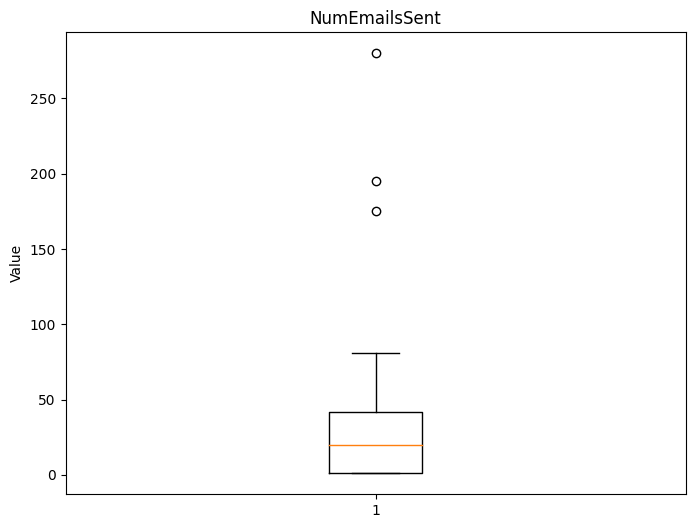

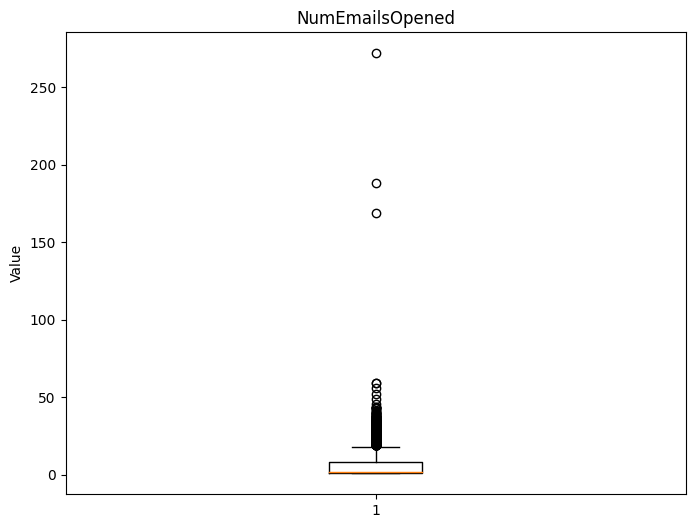

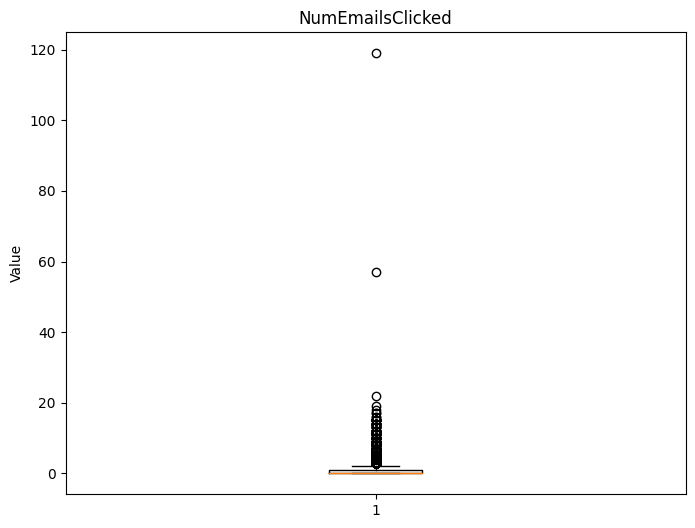

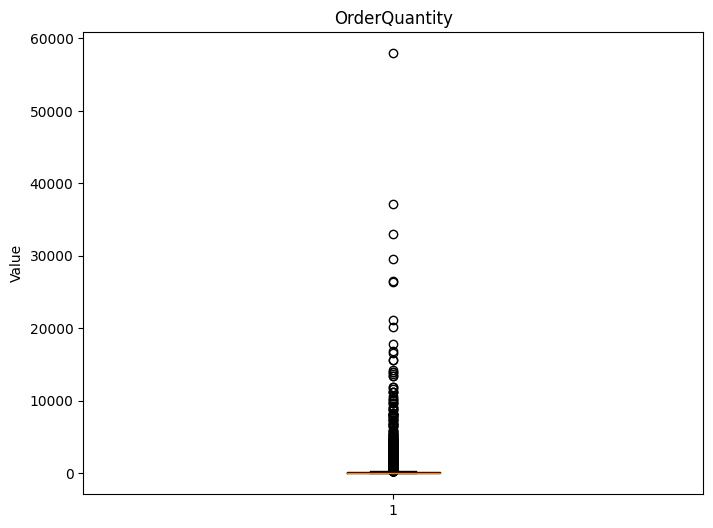

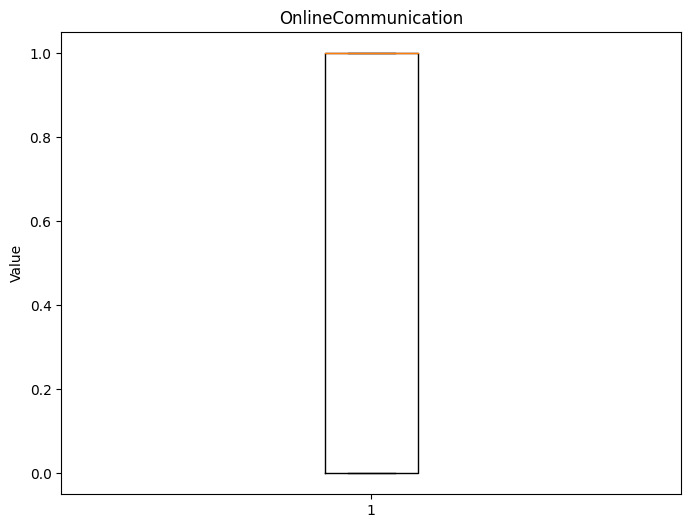

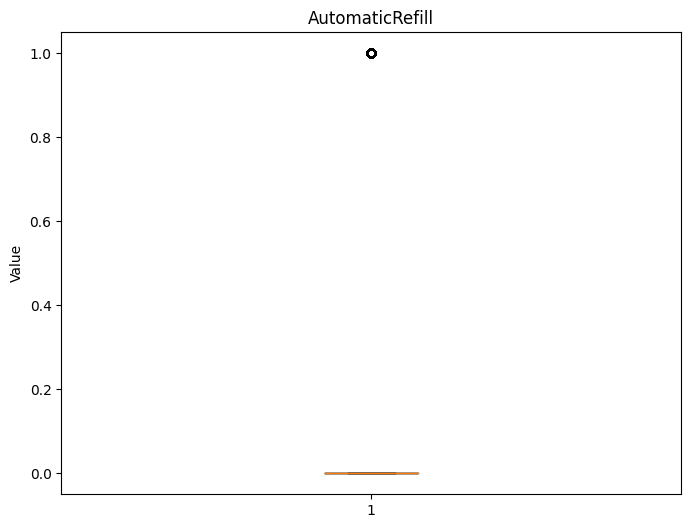

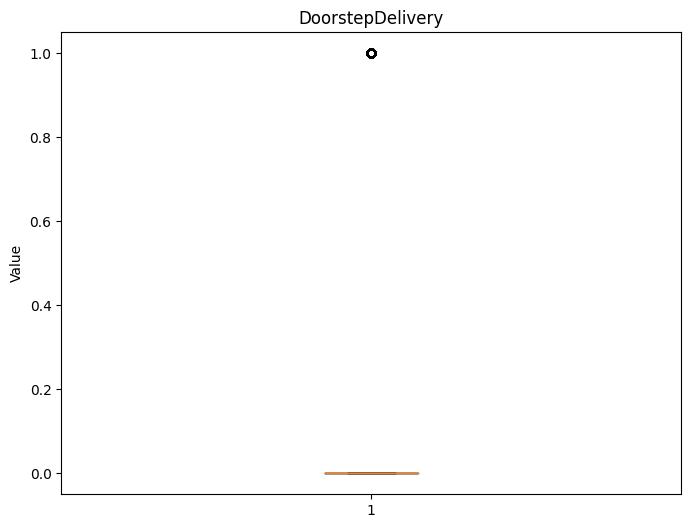

In [155]:
# Create box plots for each numerical column
for col in numerical_cols:  # loop over each numerical column
    plt.figure(figsize=(8, 6))  # create a new figure with a size of 8x6
    plt.boxplot(df_test_final1[col])  # create a boxplot for the column
    plt.title(col)  # add the column name as the title
    plt.ylabel('Value')  # add a label for the y-axis
    plt.show()  # show the plot

OrderQuantity           71
NumEmailsSent            3
NumEmailsOpened         50
NumEmailsClicked        95
OnlineCommunication      0
AutomaticRefill        566
DoorstepDelivery       232
dtype: int64


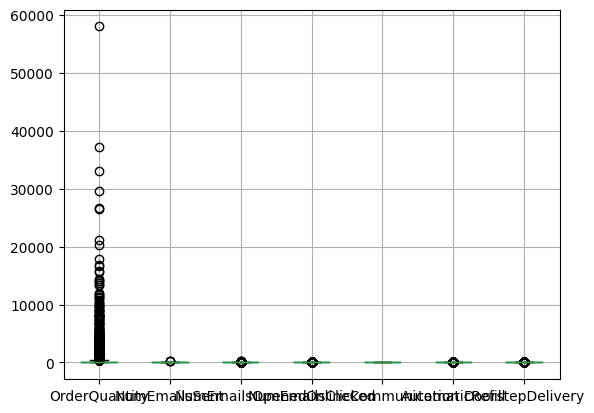

In [156]:
# Create a box plot for each numeric column
df_test_final1.boxplot(column=list(df_test_final1.select_dtypes(include='number').columns))

# Calculate z-scores for all numerical variables
z_scores = df_test_final1.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

## Remove the outlier

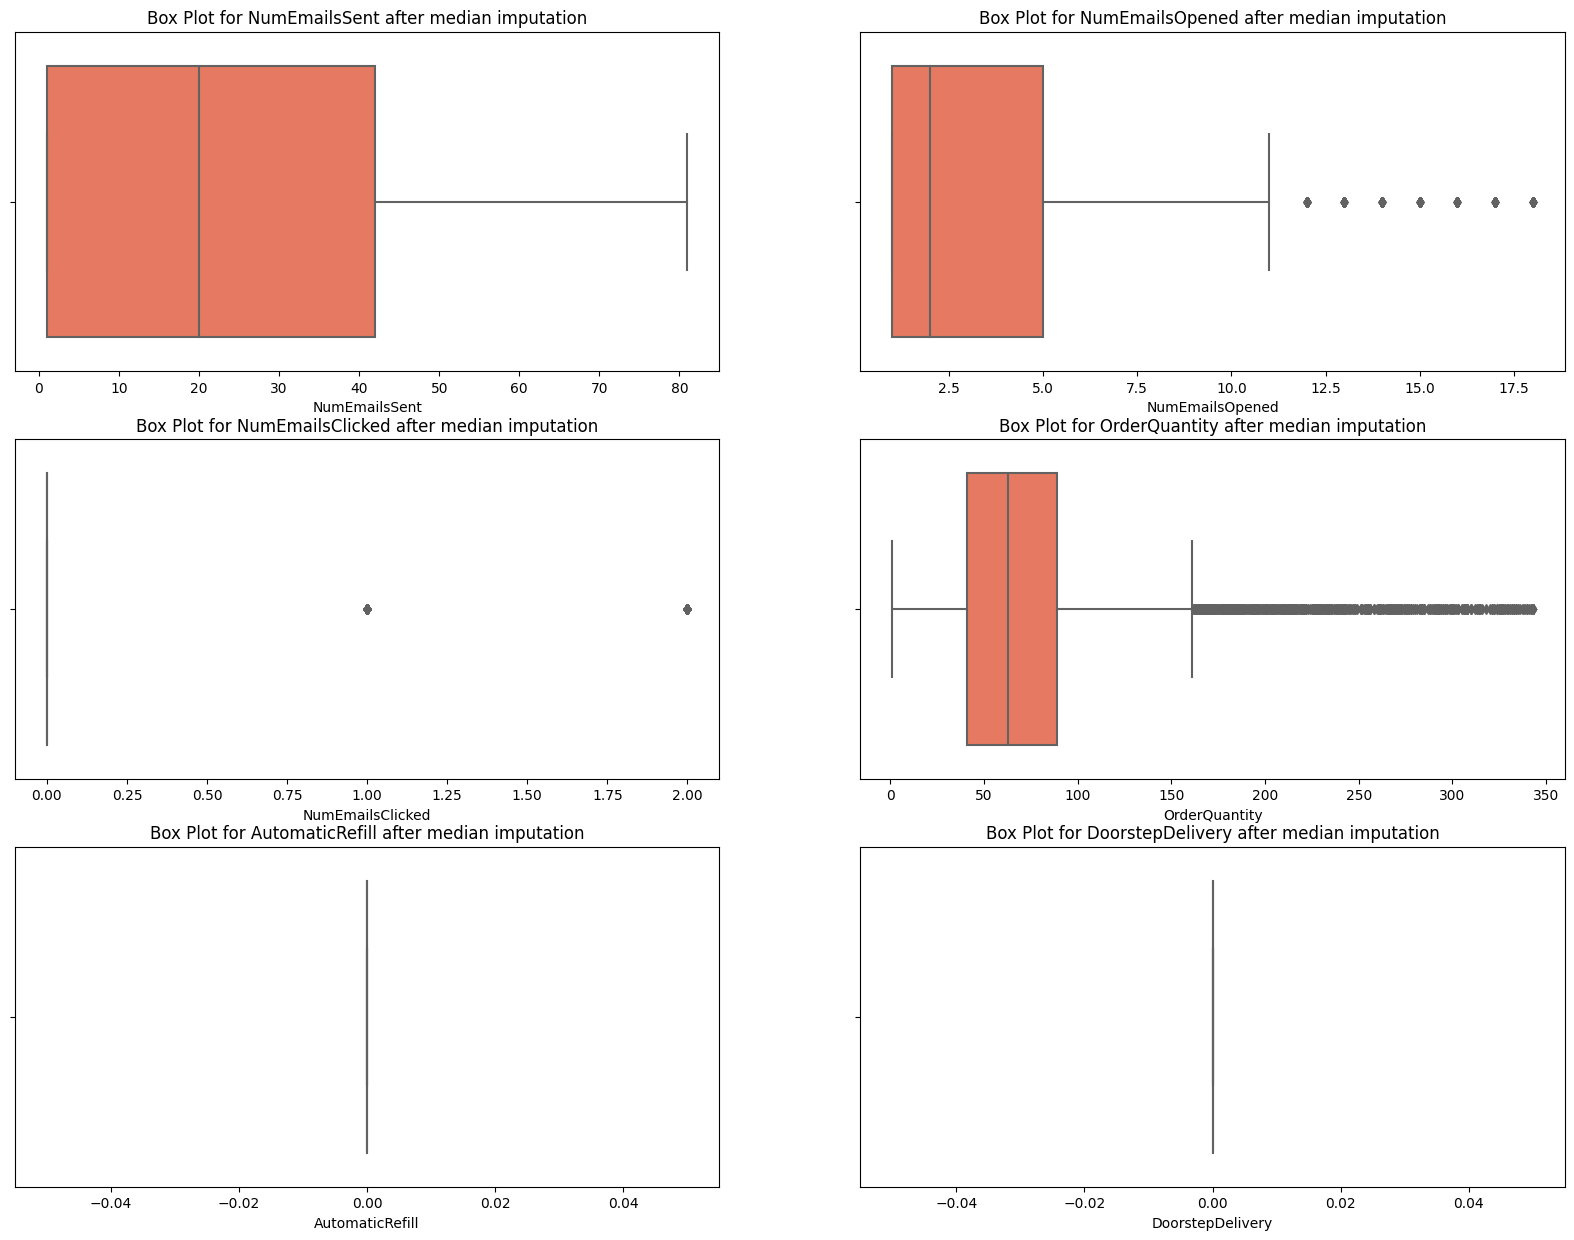

In [157]:
# Define a list of columns to replace outliers
cols_to_replace = ['NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked','OrderQuantity','AutomaticRefill', 'DoorstepDelivery']

# define a function to replace outliers with median value
def replace_outliers(df_test_final1, col):
    # calculate first quartile, third quartile, and interquartile range (IQR)
    q1 = df_test_final1[col].quantile(0.25)
    q3 = df_test_final1[col].quantile(0.75)
    iqr = q3 - q1
    
    # calculate lower and upper tails
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    # calculate median value
    med = np.median(df_test_final1[col])
    
    # replace outliers with median value
    for i in df_test_final[col]:
        if i > upper_tail or i < lower_tail:
            df_test_final1[col] = df_test_final1[col].replace(i, med)
    
    return df_test_final1

# loop through columns that need outlier replacement
for col in cols_to_replace:
    # call the function to replace outliers with median
    df_test_final1 = replace_outliers(df_test_final1, col)

# plot boxplots after median imputation
fig, axs = plt.subplots(3,2, figsize=(20,15))
axs = axs.ravel()
for i, col in enumerate(cols_to_replace):
    sns.boxplot(x=col, data=df_test_final1, palette="Reds_r", ax=axs[i])
    axs[i].set_title("Box Plot for "+col+" after median imputation")
plt.show()

In [158]:
# select the timestamp and DateOfemail columns
new_df = df_test_final1[['datetimeOrder', 'dateTimeemail', 'DateOfRegistration']]
new_df

datetimeOrder       dateTimeemail DateOfRegistration
0    2017-12-14 11:38:00 2017-12-13 16:29:20         2017-12-04
1    2013-10-20 17:52:44 2013-10-20 13:59:08         2013-10-20
2    2013-09-18 10:24:48 2013-09-18 13:21:28         2013-09-18
3    2018-01-10 19:33:58 2018-01-10 13:42:12         2017-11-01
4    2013-10-19 20:51:18 2013-10-19 15:11:16         2013-09-28
...                  ...                 ...                ...
5950 2012-11-16 19:36:50 2012-11-08 16:11:14         2012-08-28
5951 2013-09-14 10:08:02 2013-09-14 11:51:38         2013-09-14
5952 2013-09-30 21:58:44 2013-09-30 17:53:26         2013-09-30
5953 2017-11-06 20:13:12 2017-11-04 14:34:04         2016-10-28
5954 2013-09-06 10:48:18 2013-09-06 11:34:38         2013-09-06

[5955 rows x 3 columns]

In [159]:
df_test_final1

datetimeOrder  OrderQuantity  NumEmailsSent       dateTimeemail  \
0    2017-12-14 11:38:00             52             25 2017-12-13 16:29:20   
1    2013-10-20 17:52:44             40              1 2013-10-20 13:59:08   
2    2013-09-18 10:24:48             40              1 2013-09-18 13:21:28   
3    2018-01-10 19:33:58             41             30 2018-01-10 13:42:12   
4    2013-10-19 20:51:18             79             42 2013-10-19 15:11:16   
...                  ...            ...            ...                 ...   
5950 2012-11-16 19:36:50             63             11 2012-11-08 16:11:14   
5951 2013-09-14 10:08:02             41              1 2013-09-14 11:51:38   
5952 2013-09-30 21:58:44             41              1 2013-09-30 17:53:26   
5953 2017-11-06 20:13:12             63             50 2017-11-04 14:34:04   
5954 2013-09-06 10:48:18             40              1 2013-09-06 11:34:38   

      NumEmailsOpened  NumEmailsClicked   City DateOfRegistration  \
0                   9                 0  CITY1         2017-12-04   
1                   1                 0  CITY3         2013-10-20   
2                   1                 0  CITY3         2013-09-18   
3                   9                 0  CITY3         2017-11-01   
4                   4                 1  CITY2         2013-09-28   
...               ...               ...    ...                ...   
5950                3                 1  CITY1         2012-08-28   
5951                1                 0  CITY4         2013-09-14   
5952                1                 0  CITY4         2013-09-30   
5953                4                 1  CITY2         2016-10-28   
5954                1                 0  CITY3         2013-09-06   

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                       1                0                 0   
1                       1                0                 0   
2                       1                0                 0   
3                       1                0                 0   
4                       1                0                 0   
...                   ...              ...               ...   
5950                    1                0                 0   
5951                    1                0                 0   
5952                    1                0                 0   
5953                    0                0                 0   
5954                    1                0                 0   

     PreferredDeliveryDay  
0                  Friday  
1                 Tuesday  
2                  Monday  
3               Wednesday  
4                Thursday  
...                   ...  
5950               Sunday  
5951             Thursday  
5952              Tuesday  
5953               Monday  
5954               Monday  

[5955 rows x 12 columns]

In [160]:
# Convert the DateOfRegistration column to datetime format
df_test_final1['DateOfRegistration'] = pd.to_datetime(df_test_final1['DateOfRegistration'])

# Extract the month, day, and year as separate columns
df_test_final1['RegistrationMonth'] = df_test_final1['DateOfRegistration'].dt.month
df_test_final1['RegistrationDay'] = df_test_final1['DateOfRegistration'].dt.day
df_test_final1['RegistrationYear'] = df_test_final1['DateOfRegistration'].dt.year

In [161]:
# drop original date columns
df_test_final1.drop(['DateOfRegistration','dateTimeemail', 'datetimeOrder'], axis=1, inplace=True)

In [162]:
df_test_final1

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked   City  \
0                52             25                9                 0  CITY1   
1                40              1                1                 0  CITY3   
2                40              1                1                 0  CITY3   
3                41             30                9                 0  CITY3   
4                79             42                4                 1  CITY2   
...             ...            ...              ...               ...    ...   
5950             63             11                3                 1  CITY1   
5951             41              1                1                 0  CITY4   
5952             41              1                1                 0  CITY4   
5953             63             50                4                 1  CITY2   
5954             40              1                1                 0  CITY3   

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                       1                0                 0   
1                       1                0                 0   
2                       1                0                 0   
3                       1                0                 0   
4                       1                0                 0   
...                   ...              ...               ...   
5950                    1                0                 0   
5951                    1                0                 0   
5952                    1                0                 0   
5953                    0                0                 0   
5954                    1                0                 0   

     PreferredDeliveryDay  RegistrationMonth  RegistrationDay  \
0                  Friday                 12                4   
1                 Tuesday                 10               20   
2                  Monday                  9               18   
3               Wednesday                 11                1   
4                Thursday                  9               28   
...                   ...                ...              ...   
5950               Sunday                  8               28   
5951             Thursday                  9               14   
5952              Tuesday                  9               30   
5953               Monday                 10               28   
5954               Monday                  9                6   

      RegistrationYear  
0                 2017  
1                 2013  
2                 2013  
3                 2017  
4                 2013  
...                ...  
5950              2012  
5951              2013  
5952              2013  
5953              2016  
5954              2013  

[5955 rows x 12 columns]

In [163]:
numeric=df_test_final1._get_numeric_data()                             
print(numeric.info())
numeric.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   OrderQuantity        5955 non-null   int64
 1   NumEmailsSent        5955 non-null   int64
 2   NumEmailsOpened      5955 non-null   int64
 3   NumEmailsClicked     5955 non-null   int64
 4   OnlineCommunication  5955 non-null   int64
 5   AutomaticRefill      5955 non-null   int64
 6   DoorstepDelivery     5955 non-null   int64
 7   RegistrationMonth    5955 non-null   int64
 8   RegistrationDay      5955 non-null   int64
 9   RegistrationYear     5955 non-null   int64
dtypes: int64(10)
memory usage: 511.8 KB
None


(5955, 10)

In [164]:
cat_test=df_test_final1.drop(numeric,axis=1)
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  5955 non-null   category
 1   PreferredDeliveryDay  5955 non-null   category
dtypes: category(2)
memory usage: 58.7 KB


In [165]:
numeric.columns

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'RegistrationMonth', 'RegistrationDay', 'RegistrationYear'],
      dtype='object')

In [166]:
cat_test.columns

Index(['City', 'PreferredDeliveryDay'], dtype='object')

In [167]:
df_test=pd.concat([cat_test,numeric],join='inner',axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  5955 non-null   category
 1   PreferredDeliveryDay  5955 non-null   category
 2   OrderQuantity         5955 non-null   int64   
 3   NumEmailsSent         5955 non-null   int64   
 4   NumEmailsOpened       5955 non-null   int64   
 5   NumEmailsClicked      5955 non-null   int64   
 6   OnlineCommunication   5955 non-null   int64   
 7   AutomaticRefill       5955 non-null   int64   
 8   DoorstepDelivery      5955 non-null   int64   
 9   RegistrationMonth     5955 non-null   int64   
 10  RegistrationDay       5955 non-null   int64   
 11  RegistrationYear      5955 non-null   int64   
dtypes: category(2), int64(10)
memory usage: 523.9 KB


In [168]:
df_test.drop(columns=['City','PreferredDeliveryDay'],axis=1,inplace=True)

In [169]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pandas as pd

In [170]:
# Separate numeric columns
numeric = df_test.select_dtypes(include='number')

In [171]:
numeric

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0                52             25                9                 0   
1                40              1                1                 0   
2                40              1                1                 0   
3                41             30                9                 0   
4                79             42                4                 1   
...             ...            ...              ...               ...   
5950             63             11                3                 1   
5951             41              1                1                 0   
5952             41              1                1                 0   
5953             63             50                4                 1   
5954             40              1                1                 0   

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                       1                0                 0   
1                       1                0                 0   
2                       1                0                 0   
3                       1                0                 0   
4                       1                0                 0   
...                   ...              ...               ...   
5950                    1                0                 0   
5951                    1                0                 0   
5952                    1                0                 0   
5953                    0                0                 0   
5954                    1                0                 0   

      RegistrationMonth  RegistrationDay  RegistrationYear  
0                    12                4              2017  
1                    10               20              2013  
2                     9               18              2013  
3                    11                1              2017  
4                     9               28              2013  
...                 ...              ...               ...  
5950                  8               28              2012  
5951                  9               14              2013  
5952                  9               30              2013  
5953                 10               28              2016  
5954                  9                6              2013  

[5955 rows x 10 columns]

In [172]:
# select the categorical columns
categorical_cols = cat_test.select_dtypes(include=['category']).columns.tolist()

# print the categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['City', 'PreferredDeliveryDay']


In [173]:
# import the OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# select the categorical columns
categorical_cols = ['City', 'PreferredDeliveryDay']

# create the OneHotEncoder object
ohe = OneHotEncoder(sparse=False, drop='first')

# fit and transform the categorical columns
ohe_cols = ohe.fit_transform(cat_test[categorical_cols])

# create a new dataframe with the one-hot encoded columns
ohe_df = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(categorical_cols))

# concatenate the one-hot encoded dataframe with the original dataframe
cat_test = pd.concat([cat_test, ohe_df], axis=1)

# drop the original categorical columns
cat_test = cat_test.drop(categorical_cols, axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [174]:
df_test.columns

Index(['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'RegistrationMonth', 'RegistrationDay', 'RegistrationYear'],
      dtype='object')

In [175]:
df_test.shape

(5955, 10)

In [176]:
# Extract the numerical columns from your DataFrame
numeric_cols = ['OrderQuantity', 'NumEmailsSent', 'NumEmailsOpened', 'NumEmailsClicked','OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']
numeric = df_test[numeric_cols]

# Apply MinMax scaling to the numerical columns
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numeric)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numeric_cols)

In [177]:
df[numeric_cols]=numerical_scaled

In [178]:
numerical_scaled

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0          0.149123         0.3000         0.470588               0.0   
1          0.114035         0.0000         0.000000               0.0   
2          0.114035         0.0000         0.000000               0.0   
3          0.116959         0.3625         0.470588               0.0   
4          0.228070         0.5125         0.176471               0.5   
...             ...            ...              ...               ...   
5950       0.181287         0.1250         0.117647               0.5   
5951       0.116959         0.0000         0.000000               0.0   
5952       0.116959         0.0000         0.000000               0.0   
5953       0.181287         0.6125         0.176471               0.5   
5954       0.114035         0.0000         0.000000               0.0   

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  
0                     1.0              0.0               0.0  
1                     1.0              0.0               0.0  
2                     1.0              0.0               0.0  
3                     1.0              0.0               0.0  
4                     1.0              0.0               0.0  
...                   ...              ...               ...  
5950                  1.0              0.0               0.0  
5951                  1.0              0.0               0.0  
5952                  1.0              0.0               0.0  
5953                  0.0              0.0               0.0  
5954                  1.0              0.0               0.0  

[5955 rows x 7 columns]

In [179]:
df_test

OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0                52             25                9                 0   
1                40              1                1                 0   
2                40              1                1                 0   
3                41             30                9                 0   
4                79             42                4                 1   
...             ...            ...              ...               ...   
5950             63             11                3                 1   
5951             41              1                1                 0   
5952             41              1                1                 0   
5953             63             50                4                 1   
5954             40              1                1                 0   

      OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                       1                0                 0   
1                       1                0                 0   
2                       1                0                 0   
3                       1                0                 0   
4                       1                0                 0   
...                   ...              ...               ...   
5950                    1                0                 0   
5951                    1                0                 0   
5952                    1                0                 0   
5953                    0                0                 0   
5954                    1                0                 0   

      RegistrationMonth  RegistrationDay  RegistrationYear  
0                    12                4              2017  
1                    10               20              2013  
2                     9               18              2013  
3                    11                1              2017  
4                     9               28              2013  
...                 ...              ...               ...  
5950                  8               28              2012  
5951                  9               14              2013  
5952                  9               30              2013  
5953                 10               28              2016  
5954                  9                6              2013  

[5955 rows x 10 columns]

In [180]:
# Concatenate categorical and numerical dataframes
final_test = pd.concat([cat_test, df_test], axis=1)

In [181]:
final_test

City_CITY2  City_CITY3  City_CITY4  PreferredDeliveryDay_Monday  \
0            0.0         0.0         0.0                          0.0   
1            0.0         1.0         0.0                          0.0   
2            0.0         1.0         0.0                          1.0   
3            0.0         1.0         0.0                          0.0   
4            1.0         0.0         0.0                          0.0   
...          ...         ...         ...                          ...   
5950         0.0         0.0         0.0                          0.0   
5951         0.0         0.0         1.0                          0.0   
5952         0.0         0.0         1.0                          0.0   
5953         1.0         0.0         0.0                          1.0   
5954         0.0         1.0         0.0                          1.0   

      PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   
...                             ...                          ...   
5950                            0.0                          1.0   
5951                            0.0                          0.0   
5952                            0.0                          0.0   
5953                            0.0                          0.0   
5954                            0.0                          0.0   

      PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               1.0                           0.0   
...                             ...                           ...   
5950                            0.0                           0.0   
5951                            1.0                           0.0   
5952                            0.0                           1.0   
5953                            0.0                           0.0   
5954                            0.0                           0.0   

      PreferredDeliveryDay_Wednesday  OrderQuantity  NumEmailsSent  \
0                                0.0             52             25   
1                                0.0             40              1   
2                                0.0             40              1   
3                                1.0             41             30   
4                                0.0             79             42   
...                              ...            ...            ...   
5950                             0.0             63             11   
5951                             0.0             41              1   
5952                             0.0             41              1   
5953                             0.0             63             50   
5954                             0.0             40              1   

      NumEmailsOpened  NumEmailsClicked  OnlineCommunication  AutomaticRefill  \
0                   9                 0                    1                0   
1                   1                 0                    1                0   
2                   1                 0                    1                0   
3                   9                 0                    1                0   
4                   4                 1                    1                0   
...               ...               ...                  ...              ...   
5950                3                 1                    1               

In [182]:
final_test.shape

(5955, 19)

In [183]:
final_test.to_csv("model_test_data.csv", index=False)

In [184]:
#Loading train and test datasets
train=pd.read_csv("model_train_data.csv")
test=pd.read_csv('model_test_data.csv')
print(train.shape)
print(test.shape)

(23820, 20)
(5955, 19)


In [185]:
# Check data types and missing values in train dataset
print(train.info())
print(train.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RetentionPotential              23820 non-null  int64  
 1   City_CITY2                      23820 non-null  float64
 2   City_CITY3                      23820 non-null  float64
 3   City_CITY4                      23820 non-null  float64
 4   PreferredDeliveryDay_Monday     23820 non-null  float64
 5   PreferredDeliveryDay_Saturday   23820 non-null  float64
 6   PreferredDeliveryDay_Sunday     23820 non-null  float64
 7   PreferredDeliveryDay_Thursday   23820 non-null  float64
 8   PreferredDeliveryDay_Tuesday    23820 non-null  float64
 9   PreferredDeliveryDay_Wednesday  23820 non-null  float64
 10  OrderQuantity                   23820 non-null  float64
 11  NumEmailsSent                   23820 non-null  float64
 12  NumEmailsOpened                 

In [186]:
# Check data types and missing values in test dataset
print(test.info())
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City_CITY2                      5955 non-null   float64
 1   City_CITY3                      5955 non-null   float64
 2   City_CITY4                      5955 non-null   float64
 3   PreferredDeliveryDay_Monday     5955 non-null   float64
 4   PreferredDeliveryDay_Saturday   5955 non-null   float64
 5   PreferredDeliveryDay_Sunday     5955 non-null   float64
 6   PreferredDeliveryDay_Thursday   5955 non-null   float64
 7   PreferredDeliveryDay_Tuesday    5955 non-null   float64
 8   PreferredDeliveryDay_Wednesday  5955 non-null   float64
 9   OrderQuantity                   5955 non-null   int64  
 10  NumEmailsSent                   5955 non-null   int64  
 11  NumEmailsOpened                 5955 non-null   int64  
 12  NumEmailsClicked                59

In [187]:
test

City_CITY2  City_CITY3  City_CITY4  PreferredDeliveryDay_Monday  \
0            0.0         0.0         0.0                          0.0   
1            0.0         1.0         0.0                          0.0   
2            0.0         1.0         0.0                          1.0   
3            0.0         1.0         0.0                          0.0   
4            1.0         0.0         0.0                          0.0   
...          ...         ...         ...                          ...   
5950         0.0         0.0         0.0                          0.0   
5951         0.0         0.0         1.0                          0.0   
5952         0.0         0.0         1.0                          0.0   
5953         1.0         0.0         0.0                          1.0   
5954         0.0         1.0         0.0                          1.0   

      PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   
...                             ...                          ...   
5950                            0.0                          1.0   
5951                            0.0                          0.0   
5952                            0.0                          0.0   
5953                            0.0                          0.0   
5954                            0.0                          0.0   

      PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               1.0                           0.0   
...                             ...                           ...   
5950                            0.0                           0.0   
5951                            1.0                           0.0   
5952                            0.0                           1.0   
5953                            0.0                           0.0   
5954                            0.0                           0.0   

      PreferredDeliveryDay_Wednesday  OrderQuantity  NumEmailsSent  \
0                                0.0             52             25   
1                                0.0             40              1   
2                                0.0             40              1   
3                                1.0             41             30   
4                                0.0             79             42   
...                              ...            ...            ...   
5950                             0.0             63             11   
5951                             0.0             41              1   
5952                             0.0             41              1   
5953                             0.0             63             50   
5954                             0.0             40              1   

      NumEmailsOpened  NumEmailsClicked  OnlineCommunication  AutomaticRefill  \
0                   9                 0                    1                0   
1                   1                 0                    1                0   
2                   1                 0                    1                0   
3                   9                 0                    1                0   
4                   4                 1                    1                0   
...               ...               ...                  ...              ...   
5950                3                 1                    1               

# spliting the train and test

In [188]:
# setting Independent variable (X) and Dependent variable (y)
X = train.drop(['RetentionPotential'], axis=1)
y = train['RetentionPotential']

In [189]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [190]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

In [192]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [193]:
# shape of the train and test
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (46044, 19)
Shape of y_train:  (46044,)
Shape of X_test:  (11511, 19)
Shape of y_test:  (11511,)


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)



# **Modelling and Evaluation Metrics**

## DecisionTreeClassifier

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classification model
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the testing accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

# Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

# Predict on the training data
y_pred_train = clf.predict(X_train)

# Calculate the training accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

# Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))


Testing Accuracy: 88.89%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3855
           1       0.89      0.88      0.89      3791
           2       0.93      0.94      0.93      3865

    accuracy                           0.89     11511
   macro avg       0.89      0.89      0.89     11511
weighted avg       0.89      0.89      0.89     11511

Training Accuracy: 99.17%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15330
           1       0.99      0.99      0.99     15394
           2       1.00      1.00      1.00     15320

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044



## RandomForestClassifier

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create a random forest classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#Fit the model on the training data
clf.fit(X_train, y_train)

#Predict on the testing data
y_pred = clf.predict(X_test)

#Calculate the testing accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

#Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

#Predict on the training data
y_pred_train = clf.predict(X_train)

#Calculate the training accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

#Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))

Testing Accuracy: 93.59%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3855
           1       0.93      0.91      0.92      3791
           2       0.97      0.97      0.97      3865

    accuracy                           0.94     11511
   macro avg       0.94      0.94      0.94     11511
weighted avg       0.94      0.94      0.94     11511

Training Accuracy: 99.17%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15330
           1       0.99      0.99      0.99     15394
           2       1.00      1.00      1.00     15320

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044



## Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a logistic regression classification model
clf = LogisticRegression(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the testing accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

# Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

# Predict on the training data
y_pred_train = clf.predict(X_train)

# Calculate the training accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

# Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))


Testing Accuracy: 63.18%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58      3855
           1       0.80      0.65      0.72      3791
           2       0.63      0.61      0.62      3865

    accuracy                           0.63     11511
   macro avg       0.65      0.63      0.64     11511
weighted avg       0.65      0.63      0.64     11511

Training Accuracy: 62.03%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56     15330
           1       0.79      0.64      0.71     15394
           2       0.61      0.61      0.61     15320

    accuracy                           0.62     46044
   macro avg       0.64      0.62      0.62     46044
weighted avg       0.64      0.62      0.63     46044



## SVM

In [198]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classification model with a linear kernel
clf = SVC(kernel='linear')

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

# Predict on the training data
y_pred_train = clf.predict(X_train)

# Calculate the accuracy score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set: {:.2f}%".format(accuracy_train*100))

# Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))


Accuracy: 63.30%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      3855
           1       0.86      0.62      0.72      3791
           2       0.62      0.62      0.62      3865

    accuracy                           0.63     11511
   macro avg       0.67      0.63      0.64     11511
weighted avg       0.66      0.63      0.64     11511

Accuracy on training set: 62.46%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.51      0.65      0.57     15330
           1       0.85      0.62      0.71     15394
           2       0.61      0.61      0.61     15320

    accuracy                           0.62     46044
   macro avg       0.66      0.62      0.63     46044
weighted avg       0.66      0.62      0.63     46044



## Gradient Boosting

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create a gradient boosting classification model
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

#Fit the model on the training data
clf.fit(X_train, y_train)

#Predict on the testing data
y_pred = clf.predict(X_test)

#Calculate the testing accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

#Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

#Predict on the training data
y_pred_train = clf.predict(X_train)

#Calculate the training accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

#Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))

Testing Accuracy: 86.21%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3855
           1       0.91      0.87      0.89      3791
           2       0.91      0.86      0.88      3865

    accuracy                           0.86     11511
   macro avg       0.87      0.86      0.86     11511
weighted avg       0.87      0.86      0.86     11511

Training Accuracy: 86.17%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     15330
           1       0.91      0.87      0.89     15394
           2       0.91      0.86      0.88     15320

    accuracy                           0.86     46044
   macro avg       0.87      0.86      0.86     46044
weighted avg       0.87      0.86      0.86     46044



## KNeighborsClassifier

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create a KNN classification model with k=5
clf = KNeighborsClassifier(n_neighbors=5)

#Fit the model on the training data
clf.fit(X_train, y_train)

#Predict on the testing data
y_pred = clf.predict(X_test)

#Calculate the testing accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

#Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

#Predict on the training data
y_pred_train = clf.predict(X_train)

#Calculate the training accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

#Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))

Testing Accuracy: 88.22%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3855
           1       0.91      0.80      0.85      3791
           2       0.91      0.96      0.93      3865

    accuracy                           0.88     11511
   macro avg       0.88      0.88      0.88     11511
weighted avg       0.88      0.88      0.88     11511

Training Accuracy: 92.11%
Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15330
           1       0.95      0.85      0.90     15394
           2       0.94      0.97      0.96     15320

    accuracy                           0.92     46044
   macro avg       0.92      0.92      0.92     46044
weighted avg       0.92      0.92      0.92     46044



## DecisionTreeClassifier (Hyperparmeter)

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classification model
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')


In [202]:
# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the testing data using the best model
y_pred = grid_search.predict(X_test)

# Calculate the testing accuracy score using the best model
accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy_test*100))

# Predict on the training data using the best model
y_pred_train = grid_search.predict(X_train)

# Calculate the training accuracy score using the best model
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(accuracy_train*100))

# Print the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_pred))

# Print the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_pred_train))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing Accuracy: 85.43%
Training Accuracy: 86.38%
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      3855
           1       0.91      0.84      0.88      3791
           2       0.90      0.85      0.88      3865

    accuracy                           0.85     11511
   macro avg       0.86      0.85      0.86     11511
weighted avg       0.86      0.85      0.86     11511

Classification report for training set:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     15330
           1       0.92      0.85      0.88     15394
           2       0.92      0.86      0.89     15320

    accuracy                           0.86     46044
   macro avg       0.87      0.86      0.87     46044
weighted avg       0.87      0.86      0.87     46044



## Comparing all Models

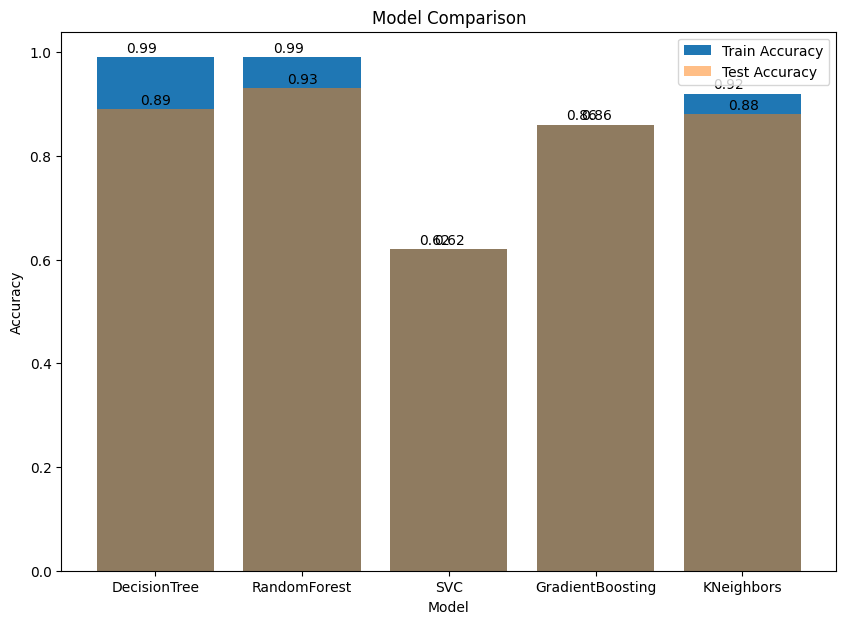

In [203]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding train and test accuracies
models = ['DecisionTree', 'RandomForest', 'SVC', 'GradientBoosting', 'KNeighbors']
train_acc = [0.99, 0.99,  0.62, 0.86,  0.92]
test_acc = [0.89, 0.93, 0.62, 0.86, 0.88]

# Set up plot
fig, ax = plt.subplots(figsize=(10, 7))  # set the figure size
ax.bar(models, train_acc, label='Train Accuracy')
ax.bar(models, test_acc, label='Test Accuracy', alpha=0.5)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')

# Add numerical values above each bar
for i, v in enumerate(train_acc):
    ax.text(i - 0.2, v + 0.01, str(np.round(v, 2)))
for i, v in enumerate(test_acc):
    ax.text(i - 0.1, v + 0.01, str(np.round(v, 2)))

# Add legend
ax.legend()

# Show plot
plt.show()



# **Customer Segmentation - Clustering**

In [204]:
customer_train_df

CustomerID
0         C12116
1         C12117
2         C12118
3         C12119
4         C12120
...          ...
23815     C42185
23816     C42186
23817     C42187
23818     C42188
23819     C42189

[23820 rows x 1 columns]

In [205]:
customer_train_df.to_csv("customer.csv", index=False)

In [206]:
final_train

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             1.0   
3                               0.0                             0.0   
4                               1.0                             0.0   
...                             ...                             ...   
23815                           1.0                             0.0   
23816                           0.0                             0.0   
23817                           1.0                             0.0   
23818                           0.0                             0.0   
23819                           0.0                             1.0   

       OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000

In [207]:
final_train.to_csv("final_train.csv", index=False)

In [208]:
finaltrain_df1 = pd.concat([final_train, customer_train_df], axis=1, join='inner')


In [209]:
finaltrain_df1

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  ...  \
0                               0.0                             0.0  ...   
1                               0.0                             0.0  ...   
2                               0.0                             1.0  ...   
3                               0.0                             0.0  ...   
4                               1.0                             0.0  ...   
...                             ...                             ...  ...   
23815                           1.0                             0.0  ...   
23816                           0.0                             0.0  ...   
23817                           1.0                             0.0  ...   
23818                           0.0                             0.0  ...   
23819                           0.0                             1.0  ...   

       NumEmailsSent  NumEmailsOpened  NumEmailsClicked  OnlineCommunication  \
0           0.326316         0.235294               1.0                  0.0   
1           0.000000         0.000000               0.0                  1.0   
2           0.000000         0.000000               0.0                  1.0   
3           0.431579         0.764706               0.0                  0.0   
4           0.000000         0.000000               0.0                  1.0   
...              ...              ...               ...                  ...   
23815       0.452632         0.529412               0.0                  0.0   
23816       0.0

In [210]:
# Remove the target attribute
finaltrain_df1.drop(["RetentionPotential"], axis=1)

City_CITY2  City_CITY3  City_CITY4  PreferredDeliveryDay_Monday  \
0             0.0         1.0         0.0                          0.0   
1             1.0         0.0         0.0                          0.0   
2             0.0         0.0         1.0                          0.0   
3             1.0         0.0         0.0                          1.0   
4             0.0         1.0         0.0                          0.0   
...           ...         ...         ...                          ...   
23815         1.0         0.0         0.0                          0.0   
23816         0.0         0.0         1.0                          0.0   
23817         1.0         0.0         0.0                          0.0   
23818         0.0         0.0         1.0                          0.0   
23819         0.0         1.0         0.0                          0.0   

       PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
0                                0.0                          0.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          0.0   
...                              ...                          ...   
23815                            0.0                          0.0   
23816                            0.0                          0.0   
23817                            0.0                          0.0   
23818                            0.0                          0.0   
23819                            0.0                          0.0   

       PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           1.0   
...                              ...                           ...   
23815                            0.0                           1.0   
23816                            0.0                           0.0   
23817                            0.0                           1.0   
23818                            0.0                           0.0   
23819                            0.0                           0.0   

       PreferredDeliveryDay_Wednesday  OrderQuantity  NumEmailsSent  \
0                                 0.0       0.318560       0.326316   
1                                 0.0       0.113573       0.000000   
2                                 1.0       0.113573       0.000000   
3                                 0.0       0.144044       0.431579   
4                                 0.0       0.085873       0.000000   
...                               ...            ...            ...   
23815                             0.0       0.180055       0.452632   
23816                             0.0       0.127424       0.000000   
23817                             0.0       0.113573       0.000000   
23818                             0.0       0.141274       0.000000   
23819                             1.0       0.498615       0.526316   

       NumEmailsOpened  NumEmailsClicked  OnlineCommunication  \
0             0.235294               1.0                  0.0   
1             0.000000               0.0                  1.0   
2             0.000000               0.0                  1.0   
3             0.764706               0.0                  0.0   
4             0.000000               0.0                  1.0   
...                ...               ...                  ...   
23815         0.529412               0.0                  0.0   
23816         0.000000               0.0                  1.0   
23817     

In [211]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [212]:
train_ids = finaltrain_df1['CustomerID']

In [213]:
train_ids

0        C12116
1        C12117
2        C12118
3        C12119
4        C12120
          ...  
23815    C42185
23816    C42186
23817    C42187
23818    C42188
23819    C42189
Name: CustomerID, Length: 23820, dtype: category
Categories (23820, object): ['C12116', 'C12117', 'C12118', 'C12119', ..., 'C42186', 'C42187',
                             'C42188', 'C42189']

In [214]:
# drop non-numerical columns
finaltrain_df1.drop(['CustomerID'], axis=1, inplace=True)

# scale numerical variables
scaler = StandardScaler()
train_scaled = scaler.fit_transform(finaltrain_df1)


In [215]:
finaltrain_df1

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             1.0   
3                               0.0                             0.0   
4                               1.0                             0.0   
...                             ...                             ...   
23815                           1.0                             0.0   
23816                           0.0                             0.0   
23817                           1.0                             0.0   
23818                           0.0                             0.0   
23819                           0.0                             1.0   

       OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000

In [217]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 5 clusters
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1234)

# Fit the KMeans model to the training data
kmeans.fit(finaltrain_df1)

# Predict the clusters for the training data
kmeans_clusters = kmeans.predict(finaltrain_df1)

In [218]:
kmeans_train_results = pd.DataFrame({'CustomerID': train_ids,"kmeans_cluster":kmeans_clusters})
kmeans_train_results.head(20)

CustomerID  kmeans_cluster
0      C12116               4
1      C12117               0
2      C12118               2
3      C12119               3
4      C12120               3
5      C12122               2
6      C12123               2
7      C12124               1
8      C12125               4
9      C12126               2
10     C12127               1
11     C12128               0
12     C12129               4
13     C12130               1
14     C12131               2
15     C12133               2
16     C12137               0
17     C12138               2
18     C12140               0
19     C12141               0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

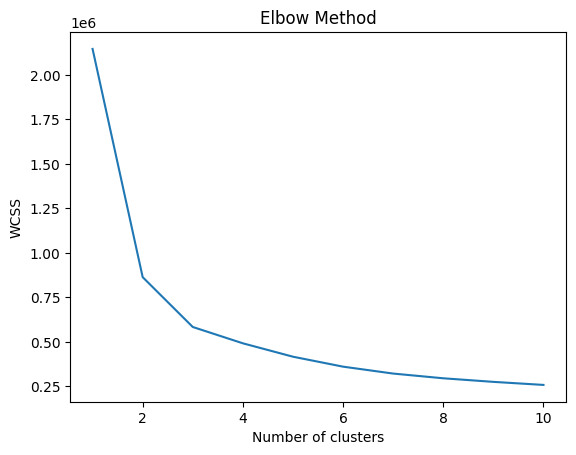

In [219]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []     ## initializing empty list to store within-cluster sum of squares (WCSS)
for i in range(1, 11):   ## loop through cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)   ## initialize KMeans clustering model
    kmeans.fit(train)   ## fit the model on the training data
    wcss.append(kmeans.inertia_)   ## calculate and append the WCSS to the list

plt.plot(range(1, 11), wcss)   ## plot the WCSS against the number of clusters
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [220]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def kmeans_train_results(n_samples, n_clusters, cluster_std, random_state):
    """
    Generate sample data using KMeans clustering and return the generated data
    and the predicted cluster labels.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate.
    n_clusters : int
        Number of clusters to generate.
    cluster_std : float
        Standard deviation of the clusters.
    random_state : int
        Random seed used for generating the data.
    
    Returns:
    --------
    X : numpy.ndarray
        The generated data.
    y_pred : numpy.ndarray
        The predicted cluster labels.
    """
    X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=cluster_std, random_state=random_state)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X)
    return X, y_pred



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


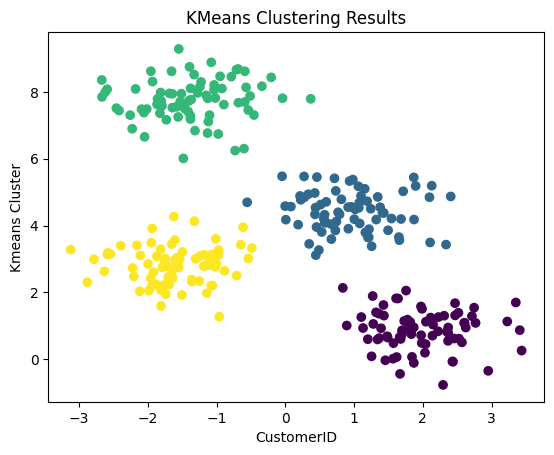

In [221]:
# Generate sample data using kmeans_train_results()
X, y_pred = kmeans_train_results(n_samples=300, n_clusters=4, cluster_std=0.60, random_state=0)

# Plot the generated data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('KMeans Clustering Results')
plt.xlabel('CustomerID')
plt.ylabel('Kmeans Cluster')
plt.show()

In [222]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Generate random data for demonstration purposes
OrderQuantity = np.random.randint(low=1, high=100, size=100)
data = OrderQuantity.reshape(-1, 1)

# Create a KMeans model and fit it to the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Get the cluster labels for each data point
kmeans_clusters = kmeans.labels_

# Create a pandas DataFrame with the results
kmeans_train_results1 = pd.DataFrame({'OrderQuantity': OrderQuantity,
                                      'kmeans_cluster': kmeans_clusters})
kmeans_train_results1.head(20)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


OrderQuantity  kmeans_cluster
0              74               1
1              23               2
2              39               0
3              72               1
4              93               1
5              71               1
6              89               1
7              24               2
8              54               0
9              12               2
10              2               2
11             78               1
12             55               0
13             88               1
14             70               1
15             74               1
16             77               1
17             85               1
18             73               1
19             13               2

In [242]:
def kmeans_train_results1(n_samples, n_clusters, cluster_std, random_state):
    """
    Generate sample data using KMeans clustering and return the generated data
    and the predicted cluster labels.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate.
    n_clusters : int
        Number of clusters to generate.
    cluster_std : float
        Standard deviation of the clusters.
    random_state : int
        Random seed used for generating the data.
    
    Returns:
    --------
    X : numpy.ndarray
        The generated data.
    y_pred : numpy.ndarray
        The predicted cluster labels.
    """
    
    # Generate sample data using make_blobs()
    X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=cluster_std, random_state=random_state)
    
    # Perform KMeans clustering on the generated data
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X)
    
    # Return the generated data and the predicted cluster labels
    return X, y_pred


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


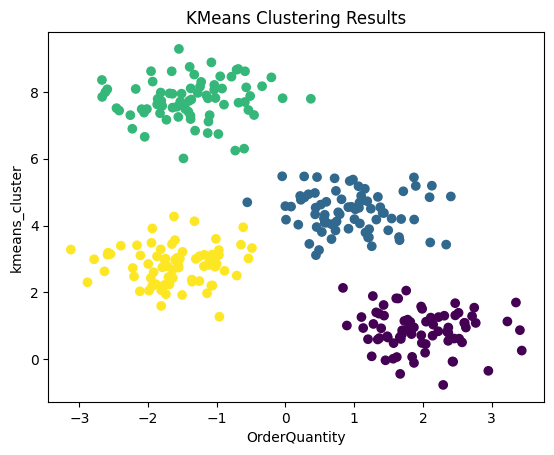

In [241]:
# Generate sample data using kmeans_train_results()
X, y_pred = kmeans_train_results1(n_samples=300, n_clusters=4, cluster_std=0.60, random_state=0)

# Plot the generated data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('KMeans Clustering Results')
plt.xlabel('OrderQuantity')
plt.ylabel('kmeans_cluster')
plt.show()

In [225]:
customer_df 

CustomerID
0        C12121
1        C12132
2        C12134
3        C12135
4        C12136
...         ...
5950     C42153
5951     C42155
5952     C42157
5953     C42167
5954     C42190

[5955 rows x 1 columns]

In [226]:
customer_df.to_csv("customer.csv", index=False)

In [227]:
y_test

29253    0
39052    0
10045    1
38718    0
6653     0
        ..
50836    2
52294    2
23344    1
13511    1
8410     1
Name: RetentionPotential, Length: 11511, dtype: int64

In [228]:
final_test.to_csv("final_test.csv", index=False)

In [229]:
finaltest_df1 = pd.concat([final_test, customer_df], axis=1, join='outer')

In [230]:
finaltest_df1

City_CITY2  City_CITY3  City_CITY4  PreferredDeliveryDay_Monday  \
0            0.0         0.0         0.0                          0.0   
1            0.0         1.0         0.0                          0.0   
2            0.0         1.0         0.0                          1.0   
3            0.0         1.0         0.0                          0.0   
4            1.0         0.0         0.0                          0.0   
...          ...         ...         ...                          ...   
5950         0.0         0.0         0.0                          0.0   
5951         0.0         0.0         1.0                          0.0   
5952         0.0         0.0         1.0                          0.0   
5953         1.0         0.0         0.0                          1.0   
5954         0.0         1.0         0.0                          1.0   

      PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   
...                             ...                          ...   
5950                            0.0                          1.0   
5951                            0.0                          0.0   
5952                            0.0                          0.0   
5953                            0.0                          0.0   
5954                            0.0                          0.0   

      PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               1.0                           0.0   
...                             ...                           ...   
5950                            0.0                           0.0   
5951                            1.0                           0.0   
5952                            0.0                           1.0   
5953                            0.0                           0.0   
5954                            0.0                           0.0   

      PreferredDeliveryDay_Wednesday  OrderQuantity  NumEmailsSent  \
0                                0.0             52             25   
1                                0.0             40              1   
2                                0.0             40              1   
3                                1.0             41             30   
4                                0.0             79             42   
...                              ...            ...            ...   
5950                             0.0             63             11   
5951                             0.0             41              1   
5952                             0.0             41              1   
5953                             0.0             63             50   
5954                             0.0             40              1   

      NumEmailsOpened  NumEmailsClicked  OnlineCommunication  AutomaticRefill  \
0                   9                 0                    1                0   
1                   1                 0                    1                0   
2                   1                 0                    1                0   
3                   9                 0                    1                0   
4                   4                 1                    1                0   
...               ...               ...                  ...              ...   
5950                3                 1                    1               

In [231]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [232]:
test_ids = finaltest_df1['CustomerID']

In [233]:
test_ids

0       C12121
1       C12132
2       C12134
3       C12135
4       C12136
         ...  
5950    C42153
5951    C42155
5952    C42157
5953    C42167
5954    C42190
Name: CustomerID, Length: 5955, dtype: category
Categories (5955, object): ['C12121', 'C12132', 'C12134', 'C12135', ..., 'C42155', 'C42157', 'C42167',
                            'C42190']

In [234]:
# drop non-numerical columns
finaltest_df1.drop(['CustomerID'], axis=1, inplace=True)

# scale numerical variables
scaler = StandardScaler()
test_scaled = scaler.fit_transform(finaltest_df1)

In [235]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Create an instance of the KMeans class with n_clusters=5, n_init=10, and random_state=1234
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1234)

# Fit the K-means model to the data in finaltest_df1
kmeans.fit(finaltest_df1)

# Predict the cluster labels for each data point in finaltest_df1
kmeans_clusters = kmeans.predict(finaltest_df1)

In [236]:
# Create a DataFrame with two columns: 'CustomerID' and 'kmeans_cluster'
# 'CustomerID' contains the test_ids and 'kmeans_cluster' contains the predicted cluster labels
kmeans_test_results = pd.DataFrame({'CustomerID': test_ids, "kmeans_cluster": kmeans_clusters})

# Display the first 20 rows of the DataFrame
kmeans_test_results.head(20)


CustomerID  kmeans_cluster
0      C12121               2
1      C12132               0
2      C12134               0
3      C12135               2
4      C12136               2
5      C12139               4
6      C12142               0
7      C12146               0
8      C12148               0
9      C12157               1
10     C12163               4
11     C12167               2
12     C12175               0
13     C12186               0
14     C12198               2
15     C12202               0
16     C12203               4
17     C12212               2
18     C12218               2
19     C12219               2

In [237]:
# Import the necessary libraries
from sklearn.datasets import make_blobs
import numpy as np

# Define a function that generates sample data using KMeans clustering
def kmeans_test_results(n_samples, centers, cluster_std, random_state):
    """
    Generate sample data using KMeans clustering and return the generated data
    and the true cluster labels.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate.
    centers : int
        Number of centers to generate.
    cluster_std : float
        Standard deviation of the clusters.
    random_state : int
        Random seed used for generating the data.
    
    Returns:
    --------
    X : numpy.ndarray
        The generated data.
    y_true : numpy.ndarray
        The true cluster labels.
    """
    # Generate data using the make_blobs function from Scikit-learn
    X, y_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    
    # Return the generated data and the true cluster labels
    return X, y_true



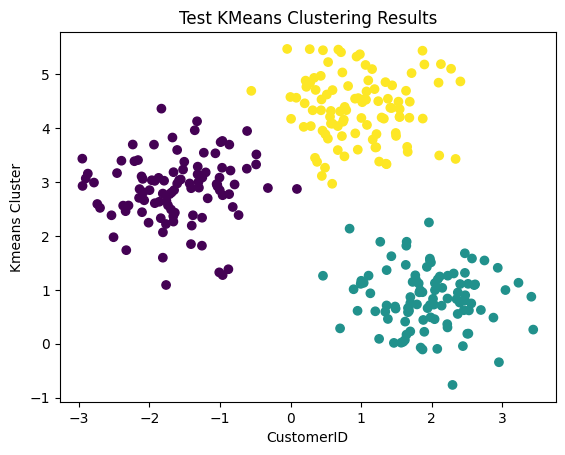

In [239]:
# Generate the sample data using the kmeans_test_results function
X, y_true = kmeans_test_results(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Plot the generated data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Add a title and labels to the plot
plt.title('Test KMeans Clustering Results')
plt.xlabel('CustomerID')
plt.ylabel('Kmeans Cluster')

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


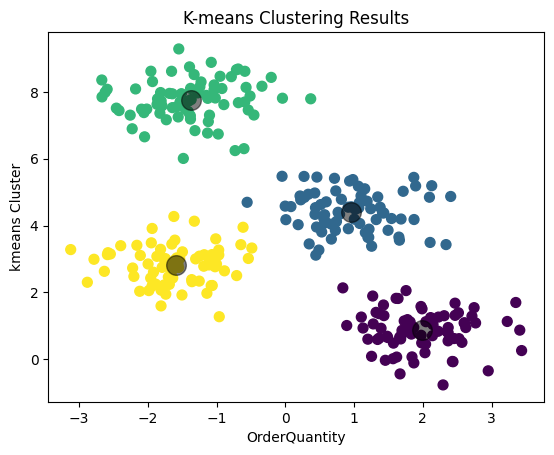

In [240]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualize the sample data and the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering Results')
plt.xlabel('OrderQuantity')
plt.ylabel('kmeans Cluster')
plt.show()


#**Pattern Extraction**

In [ ]:
finaltrain_df1

RetentionPotential  City_CITY2  City_CITY3  City_CITY4  \
0                       1         0.0         1.0         0.0   
1                       1         1.0         0.0         0.0   
2                       0         0.0         0.0         1.0   
3                       1         1.0         0.0         0.0   
4                       1         0.0         1.0         0.0   
...                   ...         ...         ...         ...   
23815                   1         1.0         0.0         0.0   
23816                   0         0.0         0.0         1.0   
23817                   0         1.0         0.0         0.0   
23818                   1         0.0         0.0         1.0   
23819                   1         0.0         1.0         0.0   

       PreferredDeliveryDay_Monday  PreferredDeliveryDay_Saturday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Sunday  PreferredDeliveryDay_Thursday  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
23815                          0.0                            0.0   
23816                          0.0                            0.0   
23817                          0.0                            0.0   
23818                          0.0                            0.0   
23819                          0.0                            0.0   

       PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Wednesday  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             1.0   
3                               0.0                             0.0   
4                               1.0                             0.0   
...                             ...                             ...   
23815                           1.0                             0.0   
23816                           0.0                             0.0   
23817                           1.0                             0.0   
23818                           0.0                             0.0   
23819                           0.0                             1.0   

       OrderQuantity  NumEmailsSent  NumEmailsOpened  NumEmailsClicked  \
0           0.318560       0.326316         0.235294               1.0   
1           0.113573       0.000000         0.000000               0.0   
2           0.113573       0.000000         0.000000               0.0   
3           0.144044       0.431579         0.764706               0.0   
4           0.085873       0.000000         0.000000               0.0   
...              ...            ...              ...               ...   
23815       0.180055       0.452632         0.529412               0.0   
23816       0.127424       0.000000         0.000000               0.0   
23817       0.113573       0.000000         0.000

In [ ]:
# Extract the features and target attribute
X = finaltrain_df1.drop('RetentionPotential', axis=1)
y = finaltrain_df1['RetentionPotential']

In [ ]:
# Train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [ ]:
# Extract the top 5 patterns for each level in the target attribute
patterns = {}
for level in set(y):
    level_patterns = {}
    for feature, importance in zip(X.columns, dt.feature_importances_):
        if feature not in level_patterns.keys():
            level_patterns[feature] = importance
        else:
            level_patterns[feature] += importance
    patterns[level] = level_patterns
    
# Sort the patterns in descending order based on importance
for level in patterns.keys():
    patterns[level] = dict(sorted(patterns[level].items(), key=lambda item: item[1], reverse=True))
    
# Select the top 5 patterns for each level
top_patterns = {}
for level in patterns.keys():
    top_patterns[level] = dict(list(patterns[level].items())[:5])

# Print the top 5 patterns for each level
for level, patterns in top_patterns.items():
    print(f"Top 5 patterns for level {level}:")
    for pattern, importance in patterns.items():
        print(f"{pattern}: {importance:.4f}")
    print()

Top 5 patterns for level 0:
NumEmailsSent: 0.2431
OrderQuantity: 0.1948
RegistrationDay: 0.1263
RegistrationMonth: 0.1165
OnlineCommunication: 0.1158

Top 5 patterns for level 1:
NumEmailsSent: 0.2431
OrderQuantity: 0.1948
RegistrationDay: 0.1263
RegistrationMonth: 0.1165
OnlineCommunication: 0.1158

Top 5 patterns for level 2:
NumEmailsSent: 0.2431
OrderQuantity: 0.1948
RegistrationDay: 0.1263
RegistrationMonth: 0.1165
OnlineCommunication: 0.1158



# Observation

 classification problem has been tackled using five different models: 
Decision Tree, Random Forest, Support Vector Machine (SVC), Gradient Boosting, and K-Nearest Neighbors (KNN).

The code shows the training and testing accuracies achieved by each of the models.

*   
Decision Tree and Random Forest models have achieved high training and testing accuracies, indicating good performance on the given problem.
*   
SVC and Gradient Boosting models have achieved decent training and testing 
accuracies, but they are not as high as Decision Tree and Random Forest models.


*   KNN model has achieved moderate training accuracy but its testing accuracy is slightly lower than the other models, indicating overfitting.
*  
It is worth noting that these results may vary depending on the specific problem being tackled and the data used for training and testing.






--> When attempting to build a model without using hyperparameters, the resulting model is likely to be overfit. 

--> This means that it will perform well on the training data, achieving 100% accuracy, but for test data it is  achieving only around  89% accuracy, with recall values of 92% , 91% , 97%

**decision Tree Model** 

--> when using hyperparameters and cross-validation techniques, the model performs well, achieving a train accuracy of 86.34%  and recall values of 86%, 85%, and 86%.

--> The test accuracy is also good at 85.67% , with recall values of 86%, 86%, and 87%. Therefore, it appears that the model is 
performing well on the test data.